# Load tools

In [2]:
import sys
sys.executable

'/Users/patrickmurphy/mambaforge/envs/jupyterenv/bin/python'

In [3]:
#%pip install gseapy
#%pip install numpy
#%pip install pydot graphviz
#%pip install matplotlib
#%pip install plotnine
#%pip install pandas
#%pip install seaborn
#%pip install scipy
#%pip install networkx

In [1]:
import pandas as pd
from plotnine import ggplot, aes, geom_tile, scale_fill_gradientn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.pyplot as plt
import pydot
import gseapy
import networkx as nx
import gseapy
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from gseapy import biomart
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap

# Load DESeq2 results

In [5]:
# Specify the path to the directory
path = '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/*res*txt'

# Use glob to get all the .res files from the directory
files = glob.glob(path)

# Print the files to check if they are being detected
print("Detected Files:", files)

# Initialize an empty string to store the formatted text
formatted_text = ""

# Iterate over each file path
for file in files:
    # Extract the filename without extension to use as variable name
    var_name = os.path.splitext(os.path.basename(file))[0]
    # Format the text
    text = f"{var_name} = pd.read_csv(\"{file}\", sep=\" \")\n"
    # Append to the formatted_text
    formatted_text += text

# Now, formatted_text contains the formatted text for all files
# You can print it to the console
print(formatted_text)

Detected Files: ['/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt', '/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoGrnKI_KI_v_WT_res_4v2.txt', '/Users/patrickmurphy/Documents/UC

In [52]:
InVitroMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_KI_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpKI_KI_v_WT_res_2v4.txt", sep=" ")
InvivoCarotid_Lig_WTvKO_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Lig_WTvKO_res.txt", sep=" ")
InVitroMsBrEC_TNF_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_TNF_KIvWT_res.txt", sep=" ")
InVitroHuHBEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHBEC_SI_v_WT_res.txt", sep=" ")
InVivoMsBrEC_KO_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoTardbpECKO_KO_v_WT_res_6v6.txt", sep=" ")
InVivoMsBrEC_GrnKI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVivoGrnKI_KI_v_WT_res_4v2.txt", sep=" ")
InvivoCarotid_Contra_WTvKO_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InvivoCarotid_Contra_WTvKO_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_Inner_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Inner_KIvWT_res.txt", sep=" ")
InVitroHuBrEC_Inner_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_Inner_siTDP43vWT_res.txt", sep=" ")
InVitroMsBrEC_K0_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_K0_v_WT_res.txt", sep=" ")
InVitroHuBrEC_TNF_siTDP43vWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_TNF_siTDP43vWT_res.txt", sep=" ")
InVitroHuBrEC_SI_v_WT_outer_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuBrEC_SI_v_WT_outer_res.txt", sep=" ")
InVitroHuHUVEC_SI_v_WT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroHuHUVEC_SI_v_WT_res.txt", sep=" ")
InVitroMsBrEC_Outer_KIvWT_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/InVitroMsBrEC_Outer_KIvWT_res.txt", sep=" ")
InVivoNuclei_Clust1v3_res = pd.read_csv("/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/2023_DESeq2_RSEM_Counts/Capillary_c1v3.csv")

In [53]:
#Invert sign of carotid data (they are run with WT v KO)

# Columns to invert
columns_to_invert = ['log2FoldChange', 'stat']  # Add other column names as needed

# Inverting the sign
InvivoCarotid_Lig_WTvKO_res[columns_to_invert] = InvivoCarotid_Lig_WTvKO_res[columns_to_invert] * -1
InvivoCarotid_Contra_WTvKO_res[columns_to_invert] = InvivoCarotid_Contra_WTvKO_res[columns_to_invert] * -1

# Load data for base mean (filtering for GSEA)

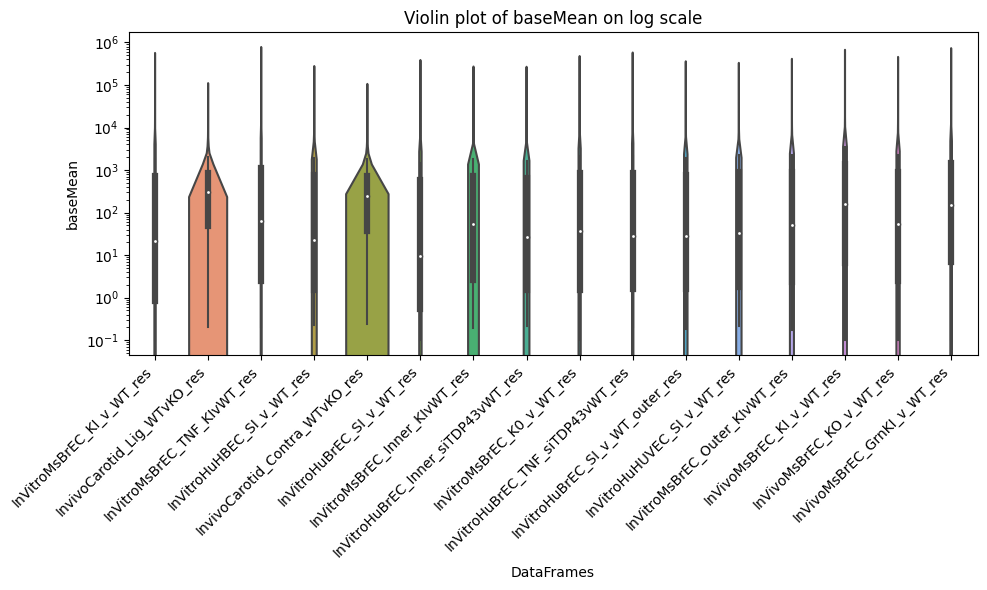

In [8]:
# Original DataFrame names and objects
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

# Extracting baseMean from each DataFrame and replacing 0 with a small number (0.1)
data = [df['baseMean'].replace(0, pd.NA).dropna().apply(lambda x: max(x, 0.1)) for df in df_dict.values()]

# Plotting the violin plot with a log scale
plt.figure(figsize=(10, 6))
sns.violinplot(data=data)
plt.yscale('log')
plt.title('Violin plot of baseMean on log scale')
plt.xlabel('DataFrames')
plt.ylabel('baseMean')

# Setting x-axis labels using the keys of the dictionary (DataFrame names)
plt.xticks(ticks=range(len(df_dict)), labels=df_dict.keys(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Create RNK files for GSEA

In [9]:
#Create RNK files for GSEA from DESeq2 data

# Original DataFrame names and objects
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

# New DataFrame dictionary
new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Filtering the DataFrame to keep only rows where baseMean >= 5
    df = df[df['baseMean'] >= 5]

    # If you want to ensure there is data after filtering you can add a check:
    if df.empty:
        print(f"No data in DataFrame {name} with baseMean >= 5")
        continue

    # Selecting only the 'log2FoldChange' column
    new_df = df[['log2FoldChange']]
    # Sorting the values based on 'log2FoldChange' in descending order
    new_df = new_df.sort_values(by='log2FoldChange', ascending=False)
    # Assigning no column names
    new_df.columns = ['']
    # Creating the new name by replacing 'res' with 'Log2FC' in the original name
    new_name = name.replace('_res', '_Log2FC')
    # Adding the new DataFrame to the new_df_dict dictionary with the new name
    new_df_dict[new_name] = new_df

# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

In [10]:
InVivoMsBrEC_GrnKI_v_WT_Log2FC

Strip2   23.057556
Vcan     22.643121
A2m      22.139591
Gprin3   22.035717
Mael     21.601154
...            ...
Lrrn4cl  -9.978228
Gm43511 -10.420898
Ifi209  -23.631721
Fndc1   -23.644568
Gm37233 -23.644568

[16427 rows x 1 columns]

In [11]:
#Create RNK files for DESeq2 from single nuclei analysis

# Original DataFrame names and objects
df_dict = {
    'InVivoNuclei_Clust1v3_res': InVivoNuclei_Clust1v3_res
}

new_df_dict = {}

# Iterating through each item in the df_dict dictionary
for name, df in df_dict.items():
    # Set '1_names' as the index
    df = df.set_index('1_names')
    
    # Selecting only the columns that contain 'logfoldchanges'
    selected_columns = [col for col in df.columns if 'logfoldchanges' in col.lower()]
    new_df = df[selected_columns]
    
    # If selected_columns is not empty, proceed to sort and other operations
    if selected_columns:
        # Sorting the values based on the selected column in descending order
        new_df = new_df.sort_values(by=selected_columns[0], ascending=False)
        
        # Assigning no column names
        new_df.columns = ['']
        
        # Creating the new name by replacing 'res' with 'Log2FC' in the original name
        new_name = name.replace('_res', '_Log2FC')
        
        # Adding the new DataFrame to the new_df_dict dictionary with the new name
        new_df_dict[new_name] = new_df
    
# Assigning each DataFrame to a variable with its name
for name in new_df_dict:
    globals()[name] = new_df_dict[name]

# Convert RNK files from mouse to human

# Convert RNK files from mouse to human

In [24]:
# Create a dictionary where keys are names and values are dataframes
dfs_dict = {
    'InVitroMsBrEC_KI_v_WT_Log2FC': InVitroMsBrEC_KI_v_WT_Log2FC,
    'InvivoCarotid_Lig_WTvKO_Log2FC': InvivoCarotid_Lig_WTvKO_Log2FC,
    'InVitroMsBrEC_TNF_KIvWT_Log2FC': InVitroMsBrEC_TNF_KIvWT_Log2FC,
    'InvivoCarotid_Contra_WTvKO_Log2FC': InvivoCarotid_Contra_WTvKO_Log2FC,
    'InVitroMsBrEC_Inner_KIvWT_Log2FC': InVitroMsBrEC_Inner_KIvWT_Log2FC,
    'InVitroMsBrEC_K0_v_WT_Log2FC': InVitroMsBrEC_K0_v_WT_Log2FC,
    'InVitroMsBrEC_Outer_KIvWT_Log2FC': InVitroMsBrEC_Outer_KIvWT_Log2FC,
    'InVivoMsBrEC_KI_v_WT_Log2FC': InVivoMsBrEC_KI_v_WT_Log2FC,
    'InVivoMsBrEC_KO_v_WT_Log2FC': InVivoMsBrEC_KO_v_WT_Log2FC,
    'InVivoMsBrEC_GrnKI_v_WT_Log2FC': InVivoMsBrEC_GrnKI_v_WT_Log2FC
}

def transform_dataframe(df, m2h_dict):
    df = df.reset_index()
    df.columns = ['GeneID', 'Value']
    df['Human_GeneID'] = df['GeneID'].map(m2h_dict)
    df.set_index('Human_GeneID', inplace=True)
    df = df[['Value']]
    return df

# Apply the function to every dataframe in the dictionary
for df_name, df in dfs_dict.items():
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"
    globals()[new_var_name] = transformed_df

# Get GSEA Public Datasets

In [12]:
# Get all library names
all_names = gseapy.get_library_name()

# Filter names that contain the string "XXX"
filt_names = [name for name in all_names if "KEGG" in name]

# Display the first 10
print(filt_names[:10])

['KEGG_2013', 'KEGG_2015', 'KEGG_2016', 'KEGG_2019_Human', 'KEGG_2019_Mouse', 'KEGG_2021_Human']


In [13]:
from biomart import BiomartServer

# Initialize the Biomart server
server = BiomartServer( "http://www.ensembl.org/biomart" )
server.verbose = True

# Choose the dataset
dataset = server.datasets['mmusculus_gene_ensembl']

# Define the attributes you want to retrieve
attributes = ['external_gene_name', 'hsapiens_homolog_associated_gene_name']

# Query mouse to human mappings
response = dataset.search({
    'attributes': attributes
})

# Create a dictionary for mouse to human gene mappings
m2h_dict = {}

# Process the response line by line
for line in response.iter_lines():
    line = line.decode('utf-8')  # Convert bytes to string if necessary
    row = line.split("\t")
    # Check if any of the required fields is missing
    if len(row) == 2 and None not in row:
        mouse_gene, human_homolog = row
        m2h_dict[mouse_gene] = human_homolog

[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching datasets
[BiomartServer:'http://www.ensembl.org/biomart/martservice'] Fetching databases
[BiomartDatabase:'Ensembl Genes 110'] Fetching datasets
[BiomartDatabase:'Mouse strains 110'] Fetching datasets
[BiomartDatabase:'Sequence'] Fetching datasets
[BiomartDatabase:'Ontology'] Fetching datasets
[BiomartDatabase:'Genomic features 110'] Fetching datasets
[BiomartDatabase:'Ensembl Variation 110'] Fetching datasets
[BiomartDatabase:'Ensembl Regulation 110'] Fetching datasets
[BiomartDataset:'mmusculus_gene_ensembl'] Searching using following params:
{'attributes': ['external_gene_name', 'hsapiens_homolog_associated_gene_name']}
[BiomartDataset:'mmusculus_gene_ensembl'] Fetching attributes
[BiomartDataset] search query:
b'<Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="1" datasetConfigVersion="0.6" count=""><Dataset name="mmusculus_gene_ensembl" interface="default"><Attribute name="external_gene_n

# Get GSEA Custom datasets (and convert mouse to human)

In [14]:
# Replace 'your_file.csv' with the path to your .csv file
file_path_human = '/Users/patrickmurphy/Desktop/CreationCustomGeneSetList/CustomGeneSetsHum2023.csv'

# Read the first three rows without considering them as headers
header_df = pd.read_csv(file_path_human, nrows=3, header=None)

# Merge the headers
merged_headers = ["_".join(header_df.iloc[:, col].astype(str)) for col in range(header_df.shape[1])]

# Read the rest of the file using the merged headers as column names, skipping the first four rows (including the original header)
df_human = pd.read_csv(file_path_human, skiprows=4, names=merged_headers)

# Initialize an empty dictionary
custom_endo_human_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_human.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_human_genesets[column] = df_human[column].dropna().tolist()

# custom_endo_genesets now contains your gene sets in the desired format

In [15]:
# Replace 'your_file.csv' with the path to your .csv file
file_path_mouse = '/Users/patrickmurphy/Desktop/CreationCustomGeneSetList/CustomGeneSetsMus2023.csv'

# Read the first three rows without considering them as headers
header_df = pd.read_csv(file_path_mouse, nrows=3, header=None)

# Merge the headers
merged_headers = ["_".join(header_df.iloc[:, col].astype(str)) for col in range(header_df.shape[1])]

# Read the rest of the file using the merged headers as column names, skipping the first four rows (including the original header)
df_mouse = pd.read_csv(file_path_mouse, skiprows=4, names=merged_headers)

# Initialize an empty dictionary
custom_endo_mus_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_mouse.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_mus_genesets[column] = df_mouse[column].dropna().tolist()

# custom_endo_genesets now contains your gene sets in the desired format

In [16]:
df_human

HUVEC_Serum_v_plasma_Up HuAEC_TNF_Up HuAEC_LPS_Up HuAEC_l1b_Up  \
0                   CNTNAP2         CSF2        CXCL2         CSF2   
1                      PRB2       IFITM1         RTP4         CSF3   
2                AC011491.1         TYMP       IFI44L         CCL5   
3                    ZNF865         RTP4       IFITM1      TNFAIP6   
4                     TRDV1        RSAD2         IFI6       CXCL11   
..                      ...          ...          ...          ...   
200                     NaN          NaN          NaN          NaN   
201                     NaN          NaN          NaN          NaN   
202                     NaN          NaN          NaN          NaN   
203                     NaN          NaN          NaN          NaN   
204                     NaN          NaN          NaN          NaN   

    HuAEC_Serum_v_plasma_Up BrainEC_TardbpSI_HuBrEC_Up  \
0                AC011491.1                   C1orf194   
1                     TRDV1                  SOX21.AS1   
2                AC239803.2                   AC008163   
3                     FSIP1                     ACTBL2   
4                     MAGI2                 AC112198.1   
..                      ...                        ...   
200                     NaN                        NaN   
201                     NaN                        NaN   
202                     NaN                        NaN   
203                     NaN                        NaN   
204                     NaN                        NaN   

    BrainEC_TardbpSI_HuBrEC_outerflow_Up BrainEC_TardbpSI_HuBrEC_innerflow_Up  \
0                                 ELAVL2                                NETO1   
1                                  MT1JP                           AC010327.2   
2                              ARHGEF34P                               PLA2G7   
3                                ARHGEF4                                 DIO2   
4                                 SMG1P6                           AL590399.3   
..                                   ...                                  ...   
200                                  NaN                                  NaN   
201                                  NaN                                  NaN   
202                                  NaN                                  NaN   
203                                  NaN                                  NaN   
204                                  NaN                                  NaN   

    BrainEC_TardbpSI_HuBrEC_TNF_Up HUVEC_TardbpSI_HUVEC_Up  ...  \
0                             TAL2                AC108866  ...   
1                         ADAMTSL5                   PRRG4  ...   
2                        HNRNPH1P3              AC107081.2  ...   
3                          FAM182A                AC099811  ...   
4                        TGFB2.OT1                AL513283  ...   
..                             ...                     ...  ...   
200                            NaN                     NaN  ...   
201                            NaN                     NaN  ...   
202                            NaN                     NaN  ...   
203                            NaN                     NaN  ...   
204                            NaN                     NaN  ...   

    BrainEC_TardbpSI_HuBrEC_TNF_Down HUVEC_TardbpSI_HUVEC_Down  \
0                              APLNR                   OLFML2A   
1                              ACKR1                   GALNT15   
2                              RXFP1                     APLNR   
3                              CD207                     ACSM3   
4                               GPR1                      GJA5   
..                               ...                       ...   
200                              NaN                       NaN   
201                              NaN                       NaN   
202                              NaN                       NaN   
203                         

In [17]:
def transform_gene_id(gene_id, mapping_dict):
    # Return the mapped gene ID or the original if not found in the mapping
    return mapping_dict.get(gene_id, gene_id)

def transform_dataframe(df_mouse, mapping_dict):
    # Apply transformation to each cell in the DataFrame
    return df_mouse.applymap(lambda x: transform_gene_id(x, mapping_dict))

# Apply the transformation
transformed_df = transform_dataframe(df_mouse, m2h_dict)

# Optionally, save the transformed DataFrame with a new variable name
df_mouse_HsGeneID = transformed_df


/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40398/3190091879.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.


In [51]:
df_mouse_HsGeneID

MsAEC_TNF_Up MsAEC_LPS_Up MsAEC_l1b_Up MsAEC_Plasma_v_basal_Up  \
0           CCL7         CCL2         LCN2                     CA2   
1                        CCL7         CCL2           1810011O10Rik   
2           SAA2                       IL6           2210404O07Rik   
3          CCL20          IL6         CCL7                 ANGPTL4   
4           GBP5        CXCL6                                FKBP5   
..           ...          ...          ...                     ...   
197        STX11       Gm5803       PDLIM4                   MFAP2   
198          NaN          NaN          NaN                     NaN   
199          NaN          NaN          NaN                     NaN   
200          NaN          NaN          NaN                     NaN   
201          NaN          NaN          NaN                     NaN   

    MsAEC_Serum_v_plasma_Up Carotid_Low_v_High_Up  \
0                      LCN2                ANGPT2   
1                  SERPINA3                 CD177   
2                      CCL7                   KIT   
3                  SERPINA3               CD300LF   
4                                            IL1B   
..                      ...                   ...   
197                 Gm12603                         
198                     NaN                   NaN   
199                     NaN                   NaN   
200                     NaN                   NaN   
201                     NaN                   NaN   

    Carotid_AntiplatletLow_v_Low_Up Carotid_ClodronatelLow_v_Low_Up  \
0                            FAM83D                          TREML4   
1                                TG                           Pira6   
2                              MXD3                            LY6S   
3                              PRND                                   
4                             TREM1                          LRRC55   
..                              ...                             ...   
197                          ANKRD1                           TIFAB   
198                             NaN                             NaN   
199                             NaN                             NaN   
200                             NaN                             NaN   
201                             NaN                             NaN   

    Carotid_RibotagLow_v_High_Up BrainEC_TardbpECKO_6v6_invivo_Up  \
0                        FAM184A                           SHCBP1   
1                                                          PIMREG   
2                         TRIM29                            ACKR2   
3                         PTGER2                            BUB1B   
4                         IGFBP2                             SPRN   
..                           ...                              ...   
197                      UBASH3B                           CDCA7L   
198                          NaN                              NaN   
199                          NaN                              NaN   
200                          NaN                              NaN   
201                          NaN                              NaN   

    BrainEC_TardbpKI_MsBrECs_invitro_Up CarotidEC_TardbpKOvWT_Contra_Up  \
0                                 FOXA2                                   
1                                  MAEL                            FRZB   
2                                  APOB                           THBS1   
3                                                                  AHSG   
4                                                                 KLF15   
..                                  ...                             ...   
197                          Gpr137b.ps                   9430008C03Rik   
198                                 NaN                             TES   
199                                 NaN                             NaN   
200                                 NaN                             NaN   
201                

In [18]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

df_mouse_HsGeneID

MsAEC_TNF_Up MsAEC_LPS_Up MsAEC_l1b_Up MsAEC_Plasma_v_basal_Up  \
0           CCL7         CCL2         LCN2                     CA2   
1                        CCL7         CCL2           1810011O10Rik   
2           SAA2                       IL6           2210404O07Rik   
3          CCL20          IL6         CCL7                 ANGPTL4   
4           GBP5        CXCL6                                FKBP5   
..           ...          ...          ...                     ...   
197        STX11       Gm5803       PDLIM4                   MFAP2   
198          NaN          NaN          NaN                     NaN   
199          NaN          NaN          NaN                     NaN   
200          NaN          NaN          NaN                     NaN   
201          NaN          NaN          NaN                     NaN   

    MsAEC_Serum_v_plasma_Up Carotid_Low_v_High_Up  \
0                      LCN2                ANGPT2   
1                  SERPINA3                 CD177   
2                      CCL7                   KIT   
3                  SERPINA3               CD300LF   
4                                            IL1B   
..                      ...                   ...   
197                 Gm12603                         
198                     NaN                   NaN   
199                     NaN                   NaN   
200                     NaN                   NaN   
201                     NaN                   NaN   

    Carotid_AntiplatletLow_v_Low_Up Carotid_ClodronatelLow_v_Low_Up  \
0                            FAM83D                          TREML4   
1                                TG                           Pira6   
2                              MXD3                            LY6S   
3                              PRND                                   
4                             TREM1                          LRRC55   
..                              ...                             ...   
197                          ANKRD1                           TIFAB   
198                             NaN                             NaN   
199                             NaN                             NaN   
200                             NaN                             NaN   
201                             NaN                             NaN   

    Carotid_RibotagLow_v_High_Up BrainEC_TardbpECKO_6v6_invivo_Up  \
0                        FAM184A                           SHCBP1   
1                                                          PIMREG   
2                         TRIM29                            ACKR2   
3                         PTGER2                            BUB1B   
4                         IGFBP2                             SPRN   
..                           ...                              ...   
197                      UBASH3B                           CDCA7L   
198                          NaN                              NaN   
199                          NaN                              NaN   
200                          NaN                              NaN   
201                          NaN                              NaN   

    BrainEC_TardbpKI_MsBrECs_invitro_Up CarotidEC_TardbpKOvWT_Contra_Up  \
0                                 FOXA2                                   
1                                  MAEL                            FRZB   
2                                  APOB                           THBS1   
3                                                                  AHSG   
4                                                                 KLF15   
..                                  ...                             ...   
197                          Gpr137b.ps                   9430008C03Rik   
198                                 NaN                             TES   
199                                 NaN                             NaN   
200                                 NaN                             NaN   
201                

In [19]:
# Initialize an empty dictionary
custom_endo_mus_HsID_genesets = {}

# Iterate over the columns in the DataFrame
for column in df_mouse_HsGeneID.columns:
    # Add a new key-value pair to the dictionary
    # Key: merged header, Value: list of non-null genes in that column
    custom_endo_mus_HsID_genesets[column] = df_mouse_HsGeneID[column].dropna().tolist()

# custom_endo_genesets now contains your gene sets in the desired format

# Convert DEseq2 results from mouse to human (_res_HsGeneID)

In [54]:
# Create a dictionary where keys are names and values are dataframes
df_dict = {
    'InVitroMsBrEC_KI_v_WT_res': InVitroMsBrEC_KI_v_WT_res,
    'InvivoCarotid_Lig_WTvKO_res': InvivoCarotid_Lig_WTvKO_res,
    'InVitroMsBrEC_TNF_KIvWT_res': InVitroMsBrEC_TNF_KIvWT_res,
#    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res' : InvivoCarotid_Contra_WTvKO_res, 
#    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
    'InVitroMsBrEC_Inner_KIvWT_res' : InVitroMsBrEC_Inner_KIvWT_res,
#    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res' : InVitroMsBrEC_K0_v_WT_res,
#    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
#    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
#    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res' : InVitroMsBrEC_Outer_KIvWT_res,
    'InVivoMsBrEC_KI_v_WT_res' : InVivoMsBrEC_KI_v_WT_res,
    'InVivoMsBrEC_KO_v_WT_res' : InVivoMsBrEC_KO_v_WT_res,
    'InVivoMsBrEC_GrnKI_v_WT_res' : InVivoMsBrEC_GrnKI_v_WT_res
}

def transform_dataframe(df, m2h_dict):
    old_index = df.index
    new_index = old_index.map(m2h_dict)  # map the old index to the new index
    df.index = new_index  # set the new index
    return df

# Apply the function to every dataframe in the dictionary
for df_name in df_dict:
    df = df_dict[df_name]
    transformed_df = transform_dataframe(df, m2h_dict)
    new_var_name = f"{df_name}_HsGeneID"  # appending "_HsGeneID" to the variable name
    globals()[new_var_name] = transformed_df  # save the transformed DataFrame as a new global variable

In [55]:
InVitroMsBrEC_KI_v_WT_res_HsGeneID

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NaN        3.179151        0.813513  0.596352  1.364149  0.172521  0.999194
NaN        0.317445        0.774325  2.147881  0.360506  0.718468  0.999194
NaN      921.291126       -0.038530  0.166296 -0.231694  0.816776  0.999194
NaN       34.786652       -0.590343  0.770232 -0.766448  0.443410  0.999194
NaN       41.353547       -0.241785  0.340506 -0.710076  0.477657  0.999194
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.158409       -0.991949  3.059679 -0.324200  0.745786  0.999194
ZYG11B  1220.481218       -0.013288  0.154834 -0.085824  0.931606  0.999194
ZYX     9752.166948       -0.045955  0.149852 -0.306673  0.759092  0.999194
ZZEF1   3270.052145        0.149254  0.123193  1.211542  0.225688  0.999194
ZZZ3    1555.877175        0.053970  0.135174  0.399260  0.689702  0.999194

[48137 rows x 6 columns]

# Run GSEA (three searches, for Public, Custom Mouse and Custom Human Sets)

In [22]:
import gseapy

# List available gene set libraries
libraries = gseapy.get_library_name()
print(libraries)

['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_202

In [25]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC,
            InVitroHuHUVEC_SI_v_WT_Log2FC,
            InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID, 
            InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID, 
            InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID,
            InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID,
            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC',
            'InVitroHuHUVEC_SI_v_WT_Log2FC',
            'InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID', 
            'InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID',
            'InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID',
            'InVivoNuclei_Clust1v3_Log2FC']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=custom_endo_mus_HsID_genesets,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_custom'] = results

2023-11-15 12:49:44,804 [WARNING] Duplicated values found in preranked stats: 0.53% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2023-11-15 12:49:44,805 [INFO] Parsing data files for GSEA.............................
2023-11-15 12:49:44,809 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-11-15 12:49:44,810 [INFO] 0042 gene_sets used for further statistical testing.....
2023-11-15 12:49:44,810 [INFO] Start to run GSEA...Might take a while..................
2023-11-15 12:49:46,300 [INFO] Congratulations. GSEApy runs successfully................

2023-11-15 12:49:46,315 [INFO] Parsing data files for GSEA.............................
2023-11-15 12:49:46,317 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-11-15 12:49:46,318 [INFO] 0042 gene_sets used for further statistical testing.....
2023-11-15 12:49:46,318 [INFO] Start to run GSEA...Might take a while..................
2

In [33]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC,
            InVitroHuHUVEC_SI_v_WT_Log2FC,
            InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID, 
            InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID, 
            InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID,
            InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID,
            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC',
            'InVitroHuHUVEC_SI_v_WT_Log2FC',
            'InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID', 
            'InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID',
            'InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID',
            'InVivoNuclei_Clust1v3_Log2FC']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets=custom_endo_human_genesets,
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1_custom2'] = results

2023-11-15 13:09:12,323 [WARNING] Duplicated values found in preranked stats: 0.53% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2023-11-15 13:09:12,324 [INFO] Parsing data files for GSEA.............................
2023-11-15 13:09:12,328 [INFO] 0001 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-11-15 13:09:12,329 [INFO] 0032 gene_sets used for further statistical testing.....
2023-11-15 13:09:12,330 [INFO] Start to run GSEA...Might take a while..................
2023-11-15 13:09:13,513 [INFO] Congratulations. GSEApy runs successfully................

2023-11-15 13:09:13,522 [INFO] Parsing data files for GSEA.............................
2023-11-15 13:09:13,524 [INFO] 0001 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-11-15 13:09:13,524 [INFO] 0032 gene_sets used for further statistical testing.....
2023-11-15 13:09:13,525 [INFO] Start to run GSEA...Might take a while..................
2

In [261]:
# Assume df_list is your list of DataFrames
df_list = [InVitroHuHBEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_SI_v_WT_Log2FC,
            InVitroHuBrEC_Inner_siTDP43vWT_Log2FC,
            InVitroHuBrEC_TNF_siTDP43vWT_Log2FC,
            InVitroHuBrEC_SI_v_WT_outer_Log2FC,
            InVitroHuHUVEC_SI_v_WT_Log2FC,
            InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID, 
            InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID, 
            InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID, 
            InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID, 
            InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID,
            InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID, 
            InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID, 
            InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID,
            InVivoNuclei_Clust1v3_Log2FC]

# Corresponding list of names for the output
df_names = ['InVitroHuHBEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_Log2FC',
            'InVitroHuBrEC_Inner_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_TNF_siTDP43vWT_Log2FC',
            'InVitroHuBrEC_SI_v_WT_outer_Log2FC',
            'InVitroHuHUVEC_SI_v_WT_Log2FC',
            'InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID', 
            'InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID', 
            'InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID',
            'InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID', 
            'InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID', 
            'InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID',
            'InVivoNuclei_Clust1v3_Log2FC']

# Loop through each DataFrame in the list and perform GSEA
for i, df in enumerate(df_list):
    results = gseapy.prerank(rnk=df,
                             gene_sets='KEGG_2021_Human,MSigDB_Hallmark_2020,',
                             threads=4,
                             min_size=5,
                             method='log2_ratio_of_classes',
                             weighted_score_type=1,
                             max_size=1000,
                             permutation_num=1000,  # reduce number to speed up testing
                             outdir=None,  # don't write to disk
                             seed=6,
                             verbose=True,  # see what's going on behind the scenes
                             )

    # If you want to assign the result to a variable with a specific name
    globals()[f'{df_names[i]}_rankedGSEA_log2_weighted1'] = results

2023-11-16 11:13:29,278 [WARNING] Duplicated values found in preranked stats: 0.53% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2023-11-16 11:13:29,279 [INFO] Parsing data files for GSEA.............................
2023-11-16 11:13:29,280 [INFO] Enrichr library gene sets already downloaded in: /Users/patrickmurphy/.cache/gseapy, use local file
2023-11-16 11:13:29,291 [INFO] Enrichr library gene sets already downloaded in: /Users/patrickmurphy/.cache/gseapy, use local file
2023-11-16 11:13:29,481 [ERROR] No supported gene_sets: 
2023-11-16 11:13:29,502 [INFO] 0007 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-11-16 11:13:29,503 [INFO] 0363 gene_sets used for further statistical testing.....
2023-11-16 11:13:29,503 [INFO] Start to run GSEA...Might take a while..................
2023-11-16 11:13:36,566 [INFO] Congratulations. GSEApy runs successfully................

2023-11-16 11:13:36,677 [INFO] Parsing data files

# Merge GSEA results (and Cat into a single saved csv file)

In [267]:
gsea_result = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_Inner_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_SI_v_WT_outer' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
#    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1 
}

# The result dataframe
merged_GSEA_df = None

for df_name, gsea_res in gsea_result.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # If merged_GSEA_df is None, assign the current df, else merge with existing merged_GSEA_df
    if merged_GSEA_df is None:
        merged_GSEA_df = df
    else:
        merged_GSEA_df = pd.merge(merged_GSEA_df, df, on='Term', how='outer')

In [268]:
gsea_result_custom = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom,
    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_Inner_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuBrEC_SI_v_WT_outer' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_rankedGSEA_log2_weighted1_custom, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom, 
#    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1_custom 
}

merged_GSEA_df_custom = None

for df_name, gsea_res in gsea_result_custom.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # Merge with existing merged_GSEA_df_custom
    if merged_GSEA_df_custom is None:
        merged_GSEA_df_custom = df
    else:
        merged_GSEA_df_custom = pd.merge(merged_GSEA_df_custom, df, on='Term', how='outer')

In [269]:
gsea_result_custom2 = {
    'InVitroMsBrEC_KI_v_WT' : InVitroMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom2,
    'InVivoCarotid_Lig_KOvWT' : InvivoCarotid_Lig_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom2,
#    'InVitroHuHBEC_SI_v_WT' : InVitroHuHBEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1, 
    'InVitroHuBrEC_SI_v_WT' : InVitroHuBrEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_Inner_SI_v_WT' : InVitroHuBrEC_Inner_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_TNF_SI_v_WT' : InVitroHuBrEC_TNF_siTDP43vWT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuBrEC_SI_v_WT_outer' : InVitroHuBrEC_SI_v_WT_outer_Log2FC_rankedGSEA_log2_weighted1_custom2, 
    'InVitroHuHUVEC_SI_v_WT' : InVitroHuHUVEC_SI_v_WT_Log2FC_rankedGSEA_log2_weighted1_custom2, 
#    'InVitroMsBrEC_TNF_KIvWT' : InVitroMsBrEC_TNF_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InvivoCarotid_Contra_KOvWT' : InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom2, 
#    'InVitroMsBrEC_Inner_KIvWT' : InVitroMsBrEC_Inner_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1, 
    'InVitroMsBrEC_K0_v_WT' : InVitroMsBrEC_K0_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom2, 
#    'InVitroMsBrEC_Outer_KIvWT' : InVitroMsBrEC_Outer_KIvWT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoMsBrEC_KI_v_WT' : InVivoMsBrEC_KI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom2, 
    'InVivoMsBrEC_K0_v_WT' : InVivoMsBrEC_KO_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1_custom2, 
#    'InVivoMsBrEC_GrnKI_v_WT' : InVivoMsBrEC_GrnKI_v_WT_Log2FC_HsGeneID_rankedGSEA_log2_weighted1,
    'InVivoNuclei_Clust1v3' : InVivoNuclei_Clust1v3_Log2FC_rankedGSEA_log2_weighted1_custom2 
}

merged_GSEA_df_custom2 = None

for df_name, gsea_res in gsea_result_custom2.items():
    # Extract result DataFrame from the GSEA result object
    df = gsea_res.res2d[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'FWER p-val']].copy()
    
    # Rename the columns except 'Term'
    df.columns = ['Term'] + [f"{col}_{df_name}" for col in df.columns if col != 'Term']
    
    # Merge with existing merged_GSEA_df_custom
    if merged_GSEA_df_custom2 is None:
        merged_GSEA_df_custom2 = df
    else:
        merged_GSEA_df_custom2 = pd.merge(merged_GSEA_df_custom2, df, on='Term', how='outer')

In [35]:
merged_GSEA_df_custom2

Term NES_InVitroMsBrEC_KI_v_WT  \
0        BrainEC_TardbpSI_HuBrEC_innerflow_Up                 -1.846387   
1                  BrainEC_TardbpSI_HuBrEC_Up                 -1.627259   
2        BrainEC_TardbpSI_HuBrEC_outerflow_Up                 -1.530485   
3                     HUVEC_TardbpSI_HUVEC_Up                 -1.477164   
4              BrainEC_TardbpSI_HuBrEC_TNF_Up                 -1.414732   
5      p1_iPSC_EC_CHIRvDMSO_PMID34755601_Down                 -1.413552   
6                      HUVEC_GSE25145_Erk5_Up                 -1.330011   
7      BrainEC_TardbpSI_HuBrEC_outerflow_Down                 -1.308769   
8                                HuAEC_LPS_Up                 -1.303871   
9                BrainEC_TardbpSI_HuBrEC_Down                 -1.279169   
10     p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down                 -1.263591   
11                  HuAEC_Serum_v_plasma_Down                 -1.232763   
12     BrainEC_TardbpSI_HuBrEC_innerflow_Down                 -1.210844   
13                  HUVEC_TardbpSI_HUVEC_Down                  1.197365   
14           BrainEC_TardbpSI_HuBrEC_TNF_Down                 -1.180275   
15                             HuAEC_LPS_Down                 -1.178511   
16       p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up                 -1.106371   
17                   HUVEC_GSE25145_Erk5_Down                 -1.074312   
18             HUVEC_PMID16341264_AdKLF2_Down                  1.072913   
19               HUVEC_PMID16341264_AdKLF2_Up                 -1.053682   
20                    HUVEC_Serum_v_plasma_Up                 -1.040869   
21                               HuAEC_l1b_Up                  1.036679   
22                               HuAEC_TNF_Up                 -1.035333   
23                             HuAEC_TNF_Down                 -1.029306   
24       p1_iPSC_EC_CHIRvDMSO_PMID34755601_Up                  1.007869   
25                             HuAEC_l1b_Down                 -0.995065   
26                    HuAEC_Serum_v_plasma_Up                 -0.946928   
27         hPSC_EC_bCatenin_PMID34755601_Down                  0.934912   
28           hPSC_EC_bCatenin_PMID34755601_Up                  0.846236   
29  Cultured_BrECs_bCatenin_PMID34755601_Down                 -0.820577   
30    Cultured_BrECs_bCatenin_PMID34755601_Up                  0.791522   
31                  HUVEC_Serum_v_plasma_Down                  0.777371   

   NOM p-val_InVitroMsBrEC_KI_v_WT FDR q-val_InVitroMsBrEC_KI_v_WT  \
0                         0.001513                        0.002315   
1                          0.00311                        0.030093   
2                         0.007752                        0.064043   
3                         0.010802                        0.086227   
4                         0.024615                        0.130556   
5                         0.016641                         0.11034   
6                         0.053973                        0.204696   
7                         0.075385                        0.211372   
8                         0.083333                        0.195473   
9                          0.09245                        0.209954   
10                        0.071322                        0.212542   
11                        0.196078                        0.250482   
12                        0.147975                        0.270655   
13                        0.145714                             1.0   
14                        0.171032                        0.307044   
15                        0.171733                        0.290355   
16                        0.268105                        0.417752   
17                        0.310709                        0.463576   
18                        0.309249                             1.0   
19                         0.36089                        0.484375   
20                        0.388013                        0.487086   
21                       

In [36]:
merged_GSEA_df_custom

Term NES_InVitroMsBrEC_KI_v_WT  \
0                     BrainEC_TardbpKI_MsBrECs_Down                 -3.079435   
1               BrainEC_TardbpKI_MsBrECs_invitro_Up                  3.057333   
2               BrainEC_TardbpKO_MsBrECs_invitro_Up                  2.136504   
3           CardiacEC_PMID28239661_KLF2KL4_dKO_Down                  1.739965   
4             BrainEC_TardbpKO_MsBrECs_invitro_Down                 -1.675709   
5                   Carotid_ClodronatelLow_v_Low_Up                  1.589872   
6                           MsAEC_Serum_v_plasma_Up                  1.589764   
7                BrainEC_TardbpECKO_6v6_invivo_Down                  1.512427   
8               BrainEC_PMID32234477_Down_AMP_v_YMP                  1.464244   
9                 ArterialEC_PMID32091396_S1p_GFPhi                 -1.419967   
10               ArterialEC_PMID32091396_S1p_GFPlow                 -1.382395   
11                                   MsAEC_LPS_Down                  1.368432   
12                          Carotid_Low_v_High_Down                  1.366692   
13                     Carotid_RibotagLow_v_High_Up                  1.355733   
14                Carotid_ClodronatelLow_v_Low_Down                 -1.347708   
15                            Carotid_Low_v_High_Up                  1.333587   
16                          MsAEC_Plasma_v_basal_Up                  1.324641   
17         BrainEC_TardbpKI_MsBrECs_2v4_invivo_Down                  1.307363   
18                                   MsAEC_TNF_Down                 -1.302923   
19                                     MsAEC_LPS_Up                  1.299299   
20                 BrainEC_TardbpECKO_6v6_invivo_Up                  1.284256   
21                                     MsAEC_TNF_Up                  1.280849   
22              BrainEC_GrnKI_MsBrECs_4v2_invivo_Up                 -1.279745   
23                                     MsAEC_l1b_Up                  1.271695   
24                Carotid_AntiplatletLow_v_Low_Down                 -1.270382   
25               ArterialEC_PMID32091396_S1pECKO_Up                  1.248946   
26            CardiacEC_PMID28239661_KLF2KL4_dKO_Up                 -1.247564   
27  Cultured_BrainECsAll_bCatenin_PMID34755601_Down                 -1.237645   
28                BrainEC_PMID32234477_Up_AMP_v_YMP                  1.233487   
29                        MsAEC_Plasma_v_basal_Down                 -1.227095   
30                   Carotid_RibotagLow_v_High_Down                  1.220568   
31                  CarotidEC_TardbpKOvWT_Contra_Up                  1.208295   
32             ArterialEC_PMID32091396_S1pECKO_Down                 -1.199085   
33                                   MsAEC_l1b_Down                  1.155881   
34    Cultured_BrainECsAll_bCatenin_PMID34755601_Up                  1.114133   
35                   CarotidEC_TardbpKOvWT_Lig_Down                  1.107567   
36                        MsAEC_Serum_v_plasma_Down                 -1.106563   
37                  Carotid_AntiplatletLow_v_Low_Up                 -1.083493   
38            BrainEC_GrnKI_MsBrECs_4v2_invivo_Down                 -1.067978   
39                     CarotidEC_TardbpKOvWT_Lig_Up                 -1.063999   
40           BrainEC_TardbpKI_MsBrECs_2v4_invivo_Up                  1.039616   
41                CarotidEC_TardbpKOvWT_Contra_Down                  0.931835   

   NOM p-val_InVitroMsBrEC_KI_v_WT FDR q-val_InVitroMsBrEC_KI_v_WT  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                        0.000896   
3                         0.005195                        0.022688   
4                          0.00152                        0.011934   
5                         0.034301                        0.065376   
6                          0.00641                        0.052659   
7  

In [37]:
# Ensure that merged_GSEA_df_custom2 also has the same columns as merged_GSEA_df
merged_GSEA_df_custom2 = merged_GSEA_df_custom2.reindex(columns=merged_GSEA_df.columns)

# Concatenate the DataFrames along rows
combined_df = pd.concat([merged_GSEA_df_custom, merged_GSEA_df, merged_GSEA_df_custom2], axis=0, ignore_index=True)

In [38]:
# Assuming InvivoCarotid_Contra_WTvKO_Log2FC_HsGeneID_rankedGSEA.res2d is your DataFrame
combined_df.to_csv('/Users/patrickmurphy/Desktop/GSEA_test_trimKI_data2023Nov15_custom.csv', header=True, index=True)

# Import GSEA results and plot heatmap

In [143]:
combined_df = pd.read_csv('/Users/patrickmurphy/Documents/UCONN/4_Notebooks/272_Leafcutter_GSEA_Tardbp/GSEA_test_trimKI_data2023Nov14_custom.csv', index_col=0)

In [144]:
combined_df

Term  NES_InVitroMsBrEC_KI_v_WT  \
0                BrainEC_TardbpKI_MsBrECs_Down                  -3.079435   
1          BrainEC_TardbpKI_MsBrECs_invitro_Up                   3.057333   
2          BrainEC_TardbpKO_MsBrECs_invitro_Up                   2.136504   
3      CardiacEC_PMID28239661_KLF2KL4_dKO_Down                   1.739965   
4        BrainEC_TardbpKO_MsBrECs_invitro_Down                  -1.675709   
..                                         ...                        ...   
435         hPSC_EC_bCatenin_PMID34755601_Down                   0.934912   
436           hPSC_EC_bCatenin_PMID34755601_Up                   0.846236   
437  Cultured_BrECs_bCatenin_PMID34755601_Down                  -0.820577   
438    Cultured_BrECs_bCatenin_PMID34755601_Up                   0.791522   
439                  HUVEC_Serum_v_plasma_Down                   0.777371   

     NOM p-val_InVitroMsBrEC_KI_v_WT  FDR q-val_InVitroMsBrEC_KI_v_WT  \
0                           0.000000                         0.000000   
1                           0.000000                         0.000000   
2                           0.000000                         0.000896   
3                           0.005195                         0.022688   
4                           0.001520                         0.011934   
..                               ...                              ...   
435                         0.584071                         0.943040   
436                         0.757660                         1.000000   
437                         0.715808                         0.818191   
438                         0.842246                         1.000000   
439                         0.922438                         0.904386   

     FWER p-val_InVitroMsBrEC_KI_v_WT  NES_InVivoCarotid_Lig_KOvWT  \
0                               0.000                    -0.857777   
1                               0.000                    -1.046346   
2                               0.001                     2.455119   
3                               0.037                    -0.851541   
4                               0.041                    -0.919928   
..                                ...                          ...   
435                             0.991                    -1.184388   
436                             0.999                     1.040734   
437                             1.000                     0.997948   
438                             1.000                    -1.111783   
439                             1.000                     0.987569   

     NOM p-val_InVivoCarotid_Lig_KOvWT  FDR q-val_InVivoCarotid_Lig_KOvWT  \
0                             0.716981                           0.908087   
1                             0.368071                           0.507450   
2                             0.000000                           0.000000   
3                             0.696391                           0.861728   
4                             0.608040                           0.794845   
..                                 ...                                ...   
435                           0.136919                           0.177230   
436                           0.384106                           0.513260   
437                           0.472381                           0.597460   
438                           0.245370                           0.260173   
439                           0.500000                           0.591147   

     FWER p-val_InVivoCarotid_Lig_KOvWT  NES_InVitroHuBrEC_SI_v_WT  \
0                                 1.000                  -1.554171   
1                                 0.990                  -1.557620   
2                                 0.000                   1.624853   
3                                 1.000                  -1.438455   
4                                 1.000                  -2.184231   
..                                  ...               

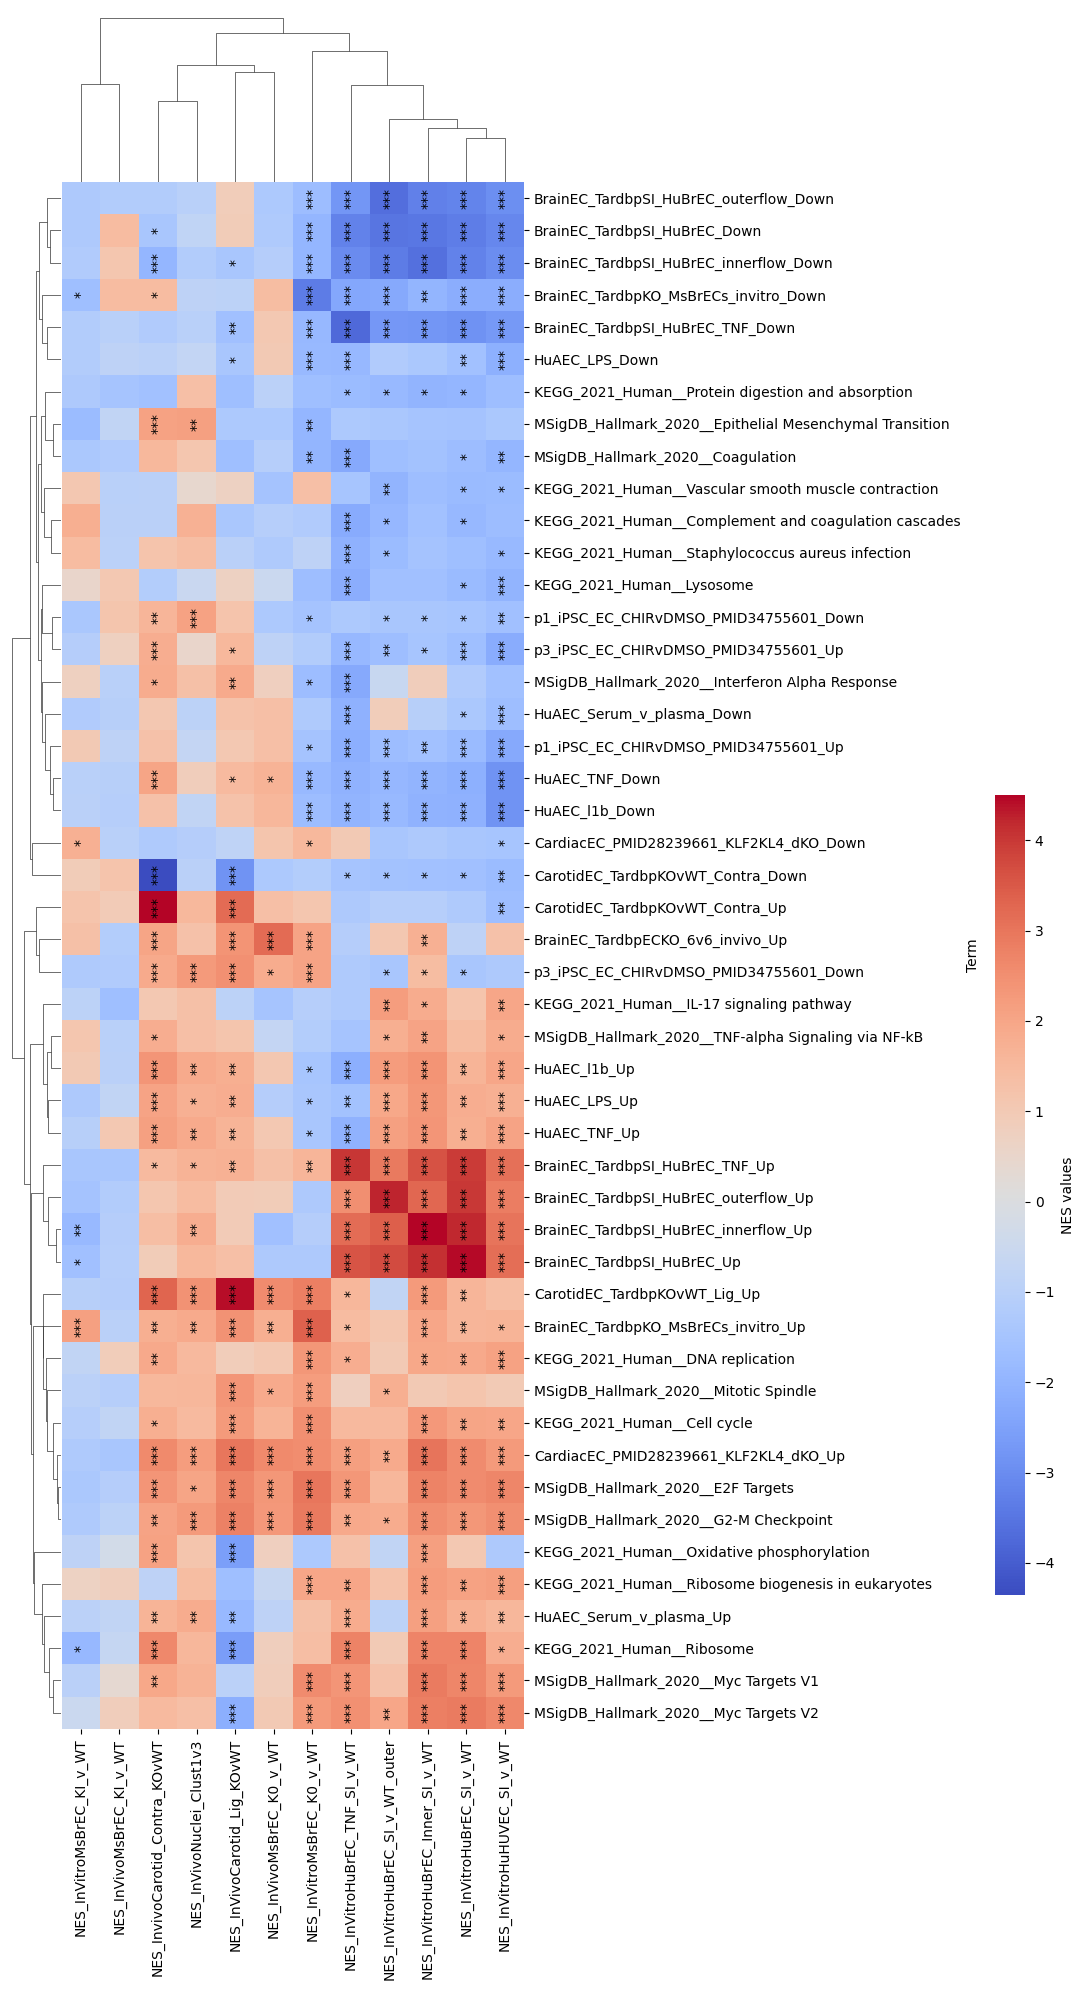

In [202]:
#This is all of the data, and used for string diagram

# List of FWER columns in the merged dataframe
fw_cols = [col for col in combined_df.columns if 'q-val' in col]

# List of direction columns (assuming they are 'NES' columns for example)
direction_cols = [col for col in combined_df.columns if 'NES' in col]

# Create a mask for rows with q-value < 0.1 in at least one datasets
qval_mask = (combined_df[fw_cols] < 0.05).sum(axis=1) >= 3

# For direction, count the number of positive and negative values in direction_cols
positive_counts = (combined_df[direction_cols] > 0).sum(axis=1)
negative_counts = (combined_df[direction_cols] < 0).sum(axis=1)

# Create masks for rows where the count of positive values or negative values is greater than 12
positive_direction_mask = positive_counts > 5
negative_direction_mask = negative_counts > 5

# Combine the two masks using bitwise OR operator
direction_mask = positive_direction_mask | negative_direction_mask

# Combine the two masks using bitwise AND operator
final_mask = qval_mask & direction_mask

# Filter the DataFrame based on the combined mask and specific terms
filter_strings = ["KEGG", "MSigDB", "BrainEC_TardbpSI", "p3", "p1", "CardiacEC", "CarotidEC", "BrainEC_TardbpKO", "BrainEC_TardbpECKO", "BrainEC_TardbpKO", "HuAEC"]  # Replace with your specific strings
string_mask = combined_df['Term'].str.contains('|'.join(filter_strings))
final_mask = final_mask & string_mask
filtered_GSEA_df = combined_df[final_mask]

# Example threshold for significance
significance_threshold = 0.05
threshold_1 = 0.01  # Less than this value will get two asterisks
threshold_2 = 0.001  # Less than this value will get three asterisks

# Columns that contain p-values or q-values
pval_qval_columns = [col for col in filtered_GSEA_df.columns if 'q-val' in col]

# Corrected part for creating the significance matrix
significance_matrix = pd.DataFrame(index=filtered_GSEA_df.index, columns=direction_cols)  # Only NES columns needed

# Corrected part for creating the significance matrix
for col in pval_qval_columns:
    q_values = filtered_GSEA_df[col]
    corresponding_nes_col = col.replace('FDR q-val', 'NES')  # Assuming FDR q-val column names map directly to NES
    
    # Assign asterisks based on significance levels
    significance_matrix[corresponding_nes_col] = q_values.apply(
        lambda x: '***' if x < threshold_2 else ('**' if x < threshold_1 else ('*' if x < significance_threshold else '')))

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Create the clustered heatmap
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    figsize=(10, 20),
    cbar_kws={"label": "NES values", "shrink": 0.5},
    xticklabels=True, 
    yticklabels=True,
    dendrogram_ratio=(.1, .1),  # Adjust the size of the dendrogram
    cbar_pos=(1, .2, .03, .4)   # Adjust the position of the colorbar
)

# Get the order of rows and columns after clustering
row_order = g.dendrogram_row.reordered_ind
col_order = g.dendrogram_col.reordered_ind

# Reorder the significance matrix to match the clustered heatmap
reordered_significance_matrix = significance_matrix.iloc[row_order, col_order]

# Add asterisks to the heatmap
for y in range(data_for_heatmap.shape[0]):
    for x in range(data_for_heatmap.shape[1]):
        asterisks = reordered_significance_matrix.iloc[y, x]
        if asterisks:  # Only add text if there are asterisks
            g.ax_heatmap.text(x + 0.5, y + 0.5, asterisks, ha='center', va='center', color='black', fontsize=10, rotation=90)

# Save the figure with 600 dpi
g.fig.savefig('/Users/patrickmurphy/Desktop/GSEA_figures/HeatMapNetwork.pdf', dpi=600, format='pdf')

# Plot overlap in terms

In [209]:
# Combine custom dataframes
GSEAterms_df = pd.concat([df_human, df_mouse_HsGeneID], axis=1)

# Combine Kegg and Hallmark dictionaries directly
all_terms = {**Kegg, **Hallmark}

# Add the terms from all_terms to GSEAterms_df
for term, genes in all_terms.items():
    GSEAterms_df[term] = pd.Series(genes)

# Get the list of index values from data_for_heatmap
index_values_to_keep = data_for_heatmap.index.tolist()

# Filter GSEAterms_df to include only columns whose names match the terms
GSEAterms_df_filtered = GSEAterms_df[GSEAterms_df.columns.intersection(index_values_to_keep)]

/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40398/1064198822.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40398/1064198822.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
/var/folders/jg/0_nc4hf97r35tfbtk88gdln40000gn/T/ipykernel_40398/1064198822.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

In [210]:
data_for_heatmap

NES_InVitroMsBrEC_KI_v_WT  \
Term                                                                            
BrainEC_TardbpKO_MsBrECs_invitro_Up                                  2.136504   
CardiacEC_PMID28239661_KLF2KL4_dKO_Down                              1.739965   
BrainEC_TardbpKO_MsBrECs_invitro_Down                               -1.675709   
BrainEC_TardbpECKO_6v6_invivo_Up                                     1.284256   
CardiacEC_PMID28239661_KLF2KL4_dKO_Up                               -1.247564   
CarotidEC_TardbpKOvWT_Contra_Up                                      1.208295   
CarotidEC_TardbpKOvWT_Lig_Up                                        -1.063999   
CarotidEC_TardbpKOvWT_Contra_Down                                    0.931835   
KEGG_2021_Human__Ribosome                                           -1.893912   
KEGG_2021_Human__Complement and coagulation cas...                   1.787955   
MSigDB_Hallmark_2020__Epithelial Mesenchymal Tr...                  -1.783430   
KEGG_2021_Human__Staphylococcus aureus infection                     1.438024   
MSigDB_Hallmark_2020__Coagulation                                   -1.378625   
MSigDB_Hallmark_2020__E2F Targets                                   -1.358630   
KEGG_2021_Human__Protein digestion and absorption                   -1.308313   
MSigDB_Hallmark_2020__G2-M Checkpoint                               -1.251355   
MSigDB_Hallmark_2020__TNF-alpha Signaling via N...                   1.117908   
KEGG_2021_Human__Vascular smooth muscle contrac...                   1.080346   
KEGG_2021_Human__Cell cycle                                         -1.079641   
MSigDB_Hallmark_2020__Myc Targets V1                                -0.995596   
MSigDB_Hallmark_2020__Mitotic Spindle                               -0.937170   
KEGG_2021_Human__IL-17 signaling pathway                            -0.907477   
KEGG_2021_Human__Oxidative phosphorylation                          -0.879496   
KEGG_2021_Human__DNA replication                                    -0.765199   
MSigDB_Hallmark_2020__Interferon Alpha Response                      0.764124   
KEGG_2021_Human__Ribosome biogenesis in eukaryotes                   0.674006   
MSigDB_Hallmark_2020__Myc Targets V2                                -0.544054   
KEGG_2021_Human__Lysosome                                            0.490858   
BrainEC_TardbpSI_HuBrEC_innerflow_Up                                -1.846387   
BrainEC_TardbpSI_HuBrEC_Up                                          -1.627259   
BrainEC_TardbpSI_HuBrEC_outerflow_Up                                -1.530485   
BrainEC_TardbpSI_HuBrEC_TNF_Up                                      -1.414732   
p1_iPSC_EC_CHIRvDMSO_PMID34755601_Down                              -1.413552   
BrainEC_TardbpSI_HuBrEC_outerflow_Down                              -1.308769   
HuAEC_LPS_Up                                                        -1.303871   
BrainEC_TardbpSI_HuBrEC_Down                                        -1.279169   
p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down                              -1.263591   
HuAEC_Serum_v_plasma_Down                                           -1.232763   
BrainEC_TardbpSI_HuBrEC_innerflow_Down                              -1.210844   
BrainEC_TardbpSI_HuBrEC_TNF_Down                                    -1.180275   
HuAEC_LPS_Down                                                      -1.178511   
p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up                                -1.106371   
HuAEC_l1b_Up                                                         1.036679   
HuAEC_TNF_Up                                                        -1.035333   
HuAEC_TNF_Down                                                      -1.029306   
p1_iPSC_EC_CHIRvDMSO_PMID34755601_Up                                 1.007869   
HuAEC_l1b_Down                                                      -0.995065   
HuAEC_Serum_v_plasma_Up                                             -0.946928   

 

In [211]:
# Create an empty dictionary with current column names as keys
column_mapping = {col: None for col in GSEAterms_df_filtered.columns}

# Print the dictionary with both key and value in quotes on a new line
for key, value in column_mapping.items():
    print(f'"{key}": "{value}",')

"HuAEC_TNF_Up": "None",
"HuAEC_LPS_Up": "None",
"HuAEC_l1b_Up": "None",
"HuAEC_Serum_v_plasma_Up": "None",
"BrainEC_TardbpSI_HuBrEC_Up": "None",
"BrainEC_TardbpSI_HuBrEC_outerflow_Up": "None",
"BrainEC_TardbpSI_HuBrEC_innerflow_Up": "None",
"BrainEC_TardbpSI_HuBrEC_TNF_Up": "None",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up": "None",
"p1_iPSC_EC_CHIRvDMSO_PMID34755601_Up": "None",
"HuAEC_TNF_Down": "None",
"HuAEC_LPS_Down": "None",
"HuAEC_l1b_Down": "None",
"HuAEC_Serum_v_plasma_Down": "None",
"BrainEC_TardbpSI_HuBrEC_Down": "None",
"BrainEC_TardbpSI_HuBrEC_outerflow_Down": "None",
"BrainEC_TardbpSI_HuBrEC_innerflow_Down": "None",
"BrainEC_TardbpSI_HuBrEC_TNF_Down": "None",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down": "None",
"p1_iPSC_EC_CHIRvDMSO_PMID34755601_Down": "None",
"BrainEC_TardbpECKO_6v6_invivo_Up": "None",
"CarotidEC_TardbpKOvWT_Contra_Up": "None",
"CarotidEC_TardbpKOvWT_Lig_Up": "None",
"BrainEC_TardbpKO_MsBrECs_invitro_Up": "None",
"CarotidEC_TardbpKOvWT_Contra_Down": "None",
"Br

In [224]:
# Create a dictionary to map old column names to new column names
column_mapping = {"HuAEC_TNF_Up": "HuAEC_TNF_Up",
"HuAEC_LPS_Up": "HuAEC_LPS_Up",
"HuAEC_l1b_Up": "HuAEC_l1b_Up",
"HuAEC_Serum_v_plasma_Up": "HuAEC_Serum_v_plasma_Up",
"BrainEC_TardbpSI_HuBrEC_Up": "TardbpSI_Up",
"BrainEC_TardbpSI_HuBrEC_outerflow_Up": "TardbpSI_OuterFlow_Up",
"BrainEC_TardbpSI_HuBrEC_innerflow_Up": "TardbpSI_InnerFlow_Up",
"BrainEC_TardbpSI_HuBrEC_TNF_Up": "TardbpSI_TNF_Up",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Up": "WntActiveLate_Up",
"p1_iPSC_EC_CHIRvDMSO_PMID34755601_Up": "WntActiveEarly_Up",
"HuAEC_TNF_Down": "HuAEC_TNF_Down",
"HuAEC_LPS_Down": "HuAEC_LPS_Down",
"HuAEC_l1b_Down": "HuAEC_l1b_Down",
"HuAEC_Serum_v_plasma_Down": "HuAEC_Serum_v_plasma_Down",
"BrainEC_TardbpSI_HuBrEC_Down": "TardbpSI_Down",
"BrainEC_TardbpSI_HuBrEC_outerflow_Down": "TardbpSI_OuterFlow_Down",
"BrainEC_TardbpSI_HuBrEC_innerflow_Down": "TardbpSI_InnerFlow_Down",
"BrainEC_TardbpSI_HuBrEC_TNF_Down": "TardbpSI_TNF_Down",
"p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down": "WntActiveLate_Down",
"p1_iPSC_EC_CHIRvDMSO_PMID34755601_Down": "WntActiveEarly_Down",
"BrainEC_TardbpECKO_6v6_invivo_Up": "InVivoTardbpECKO_Ms_brain_Up",
"CarotidEC_TardbpKOvWT_Contra_Up": "InVivoTardbpECKO_Ms_carotid_Up",
"CarotidEC_TardbpKOvWT_Lig_Up": "InVivoTardbpECKO_Ms_DFcarotid_Up",
"BrainEC_TardbpKO_MsBrECs_invitro_Up": "InVitroTardbpECKO_Ms_Up",
"CarotidEC_TardbpKOvWT_Contra_Down": "InVivoTardbpECKO_Ms_carotid_Down",
"BrainEC_TardbpKO_MsBrECs_invitro_Down": "InVitroTardbpECKO_Ms_Down",
"CardiacEC_PMID28239661_KLF2KL4_dKO_Up": "InVivo_KLF2KLF4_ECKO_Up",
"CardiacEC_PMID28239661_KLF2KL4_dKO_Down": "InVivo_KLF2KLF4_ECKO_Down",
"KEGG_2021_Human__Cell cycle": "Cell cycle",
"KEGG_2021_Human__Complement and coagulation cascades": "Complement and coagulation",
"KEGG_2021_Human__DNA replication": "DNA replication",
"KEGG_2021_Human__IL-17 signaling pathway": "IL-17",
"KEGG_2021_Human__Lysosome": "Lysosome",
"KEGG_2021_Human__Oxidative phosphorylation": "Ox Phos",
"KEGG_2021_Human__Protein digestion and absorption": "Protein digestion/absorb",
"KEGG_2021_Human__Ribosome": "Ribosome",
"KEGG_2021_Human__Ribosome biogenesis in eukaryotes": "Ribosome biogenesis",
"KEGG_2021_Human__Staphylococcus aureus infection": "StaphA Infection",
"KEGG_2021_Human__Vascular smooth muscle contraction": "VSmMuscle contraction",
"MSigDB_Hallmark_2020__TNF-alpha Signaling via NF-kB": "TNF/NF-kB",
"MSigDB_Hallmark_2020__Mitotic Spindle": "Mitotic Spindle",
"MSigDB_Hallmark_2020__G2-M Checkpoint": "G2-M Checkpoint",
"MSigDB_Hallmark_2020__Interferon Alpha Response": "Interferon Alpha",
"MSigDB_Hallmark_2020__E2F Targets": "E2F Targets",
"MSigDB_Hallmark_2020__Myc Targets V1": "Myc Targets V1",
"MSigDB_Hallmark_2020__Myc Targets V2": "Myc Targets V2",
"MSigDB_Hallmark_2020__Epithelial Mesenchymal Transition": "EpMesTransition",
"MSigDB_Hallmark_2020__Coagulation": "Coagulation"}

# Create a copy of GSEAterms_df_filtered
GSEAterms_df_filtered_copy = GSEAterms_df_filtered.copy()

# Use the rename method to replace column names in the copy
GSEAterms_df_filtered_copy.rename(columns=column_mapping, inplace=True)

In [225]:
GSEAterms_df_filtered_copy

HuAEC_TNF_Up HuAEC_LPS_Up HuAEC_l1b_Up HuAEC_Serum_v_plasma_Up  \
0           CSF2        CXCL2         CSF2              AC011491.1   
1         IFITM1         RTP4         CSF3                   TRDV1   
2           TYMP       IFI44L         CCL5              AC239803.2   
3           RTP4       IFITM1      TNFAIP6                   FSIP1   
4          RSAD2         IFI6       CXCL11                   MAGI2   
..           ...          ...          ...                     ...   
200          NaN          NaN          NaN                     NaN   
201          NaN          NaN          NaN                     NaN   
202          NaN          NaN          NaN                     NaN   
203          NaN          NaN          NaN                     NaN   
204          NaN          NaN          NaN                     NaN   

    TardbpSI_Up TardbpSI_OuterFlow_Up TardbpSI_InnerFlow_Up TardbpSI_TNF_Up  \
0      C1orf194                ELAVL2                 NETO1            TAL2   
1     SOX21.AS1                 MT1JP            AC010327.2        ADAMTSL5   
2      AC008163             ARHGEF34P                PLA2G7       HNRNPH1P3   
3        ACTBL2               ARHGEF4                  DIO2         FAM182A   
4    AC112198.1                SMG1P6            AL590399.3       TGFB2.OT1   
..          ...                   ...                   ...             ...   
200         NaN                   NaN                   NaN             NaN   
201         NaN                   NaN                   NaN             NaN   
202         NaN                   NaN                   NaN             NaN   
203         NaN                   NaN                   NaN             NaN   
204         NaN                   NaN                   NaN             NaN   

    WntActiveLate_Up WntActiveEarly_Up HuAEC_TNF_Down HuAEC_LPS_Down  \
0             APCDD1              PRND          MMRN1          TRDV1   
1               DKK2             APLNR          PALD1     AC011491.1   
2                LPL               NTS           EMCN     AC239803.2   
3              PCSK2            APCDD1          CHST1         FBXL20   
4                LSR              CCL2        CXorf36          MAGI2   
..               ...               ...            ...            ...   
200              NaN               NaN            NaN            NaN   
201              NaN               NaN            NaN            NaN   
202              NaN               NaN            NaN            NaN   
203              NaN               NaN            NaN            NaN   
204              NaN               NaN            NaN            NaN   

    HuAEC_l1b_Down HuAEC_Serum_v_plasma_Down TardbpSI_Down  \
0       AC011491.1                 RNU6-313P          AQP1   
1            TRDV1                   RF01979         MATN2   
2       AC239803.2                     FNDC5         FBLN2   
3            CHST1                    CXCL10         APLNR   
4            PALD1                   RF00586       SLCO2A1   
..             ...                       ...           ...   
200            NaN                       NaN           NaN   
201            NaN                       NaN           NaN   
202            NaN                       NaN           NaN   
203            NaN                       NaN           NaN   
204            NaN                       NaN           NaN   

    TardbpSI_OuterFlow_Down TardbpSI_InnerFlow_Down TardbpSI_TNF_Down  \
0                       ELN                    AQP1             APLNR   
1                     RAMP3                  CLEC3B             ACKR1   
2                   NEURL1B                   MATN2             RXFP1   
3                    CLEC3B                  CMKLR1             CD207   
4                      AQP1                    ACP5              GPR1   
..                      ...                     ...               ...   
200                     NaN                     NaN               NaN   
201                 

In [226]:
# Check for duplicate column names
duplicate_columns = GSEAterms_df_filtered_copy.columns[GSEAterms_df_filtered_copy.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)


Duplicate columns: Index([], dtype='object')


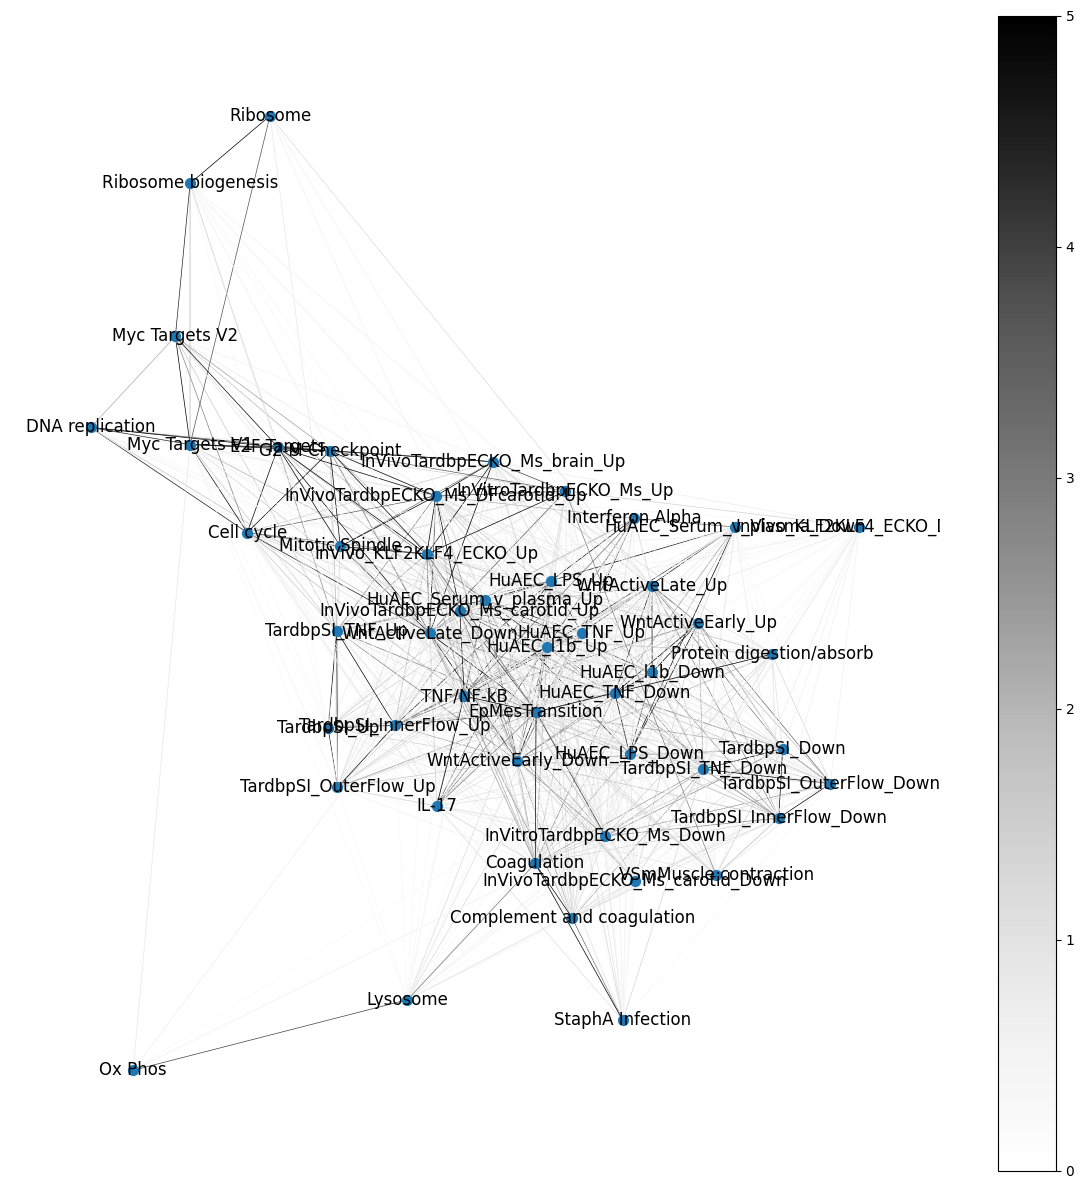

In [231]:
# Create a dictionary to store the mapping between node numbers and term names
node_names = {i: termgsea for i, termgsea in enumerate(GSEAterms_df_filtered_copy.columns)}

G = nx.Graph()

# Add nodes to the graph with numbering and store the mapping
for node, termgsea in node_names.items():
    G.add_node(node, label=termgsea)  # Add node with number and term label

    
# Add edges to the graph based on gene similarities
for i, term1 in enumerate(GSEAterms_df_filtered_copy.columns):
    for j, term2 in enumerate(GSEAterms_df_filtered_copy.columns):
        if i < j:  # Avoid self-loop and redundant connections
            genes1 = set(GSEAterms_df_filtered_copy[term1].dropna())
            genes2 = set(GSEAterms_df_filtered_copy[term2].dropna())
            common_genes = genes1.intersection(genes2)
            total_genes = genes1.union(genes2)
            num_total_genes = len(total_genes)
            num_common_genes = len(common_genes)
            if num_total_genes > 0:  # Avoid division by zero
                percent_overlap = (num_common_genes / num_total_genes) * 100
                if percent_overlap > 0:
                    G.add_edge(i, j, weight=percent_overlap, width=percent_overlap)

    
# Remove isolated nodes (those not connected to any other node)
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

for node in list(G.nodes()):
    if G.degree(node) <= 1:
        G.remove_node(node)

# After modifying the graph (adding/removing nodes and edges)
pos = nx.spring_layout(G)  # Recalculate positions for the updated graph

# Update node_labels only for nodes present in the updated graph
node_labels = {node: node_names[node] for node in G.nodes()}
        
# Now you can draw the graph
fig, ax = plt.subplots(figsize=(15, 15))

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Extracting weights from the graph for edge colors
weights = [G[u][v]['weight'] for u, v in G.edges()]

# Normalize the weights to a fixed range between 0 and 100 for coloring
norm = mcolors.Normalize(vmin=0, vmax=5)  # set fixed scale here

# Choose a colormap
cmap = plt.cm.Greys  # using Greys colormap for black and grey color scale

# Draw the graph with term labels
node_labels = {node: label for node, label in node_names.items()}
nx.draw(G, pos, labels=node_labels, with_labels=True,
        font_size=12,  # Adjust font size as needed
        edge_color=[cmap(norm(w)) for w in weights],
        width=0.5,  # Fixed thin width
        node_size=50,  # Adjust node size as needed
        ax=ax)

# Optionally, you can add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax)

plt.show()

# Save the figure as a PDF with 600 dpi
fig.savefig('/Users/patrickmurphy/Desktop/GSEA_figures/NetworkCustom.pdf', dpi=600, format='pdf')

In [230]:
node_labels

{0: 'HuAEC_TNF_Up',
 1: 'HuAEC_LPS_Up',
 2: 'HuAEC_l1b_Up',
 3: 'HuAEC_Serum_v_plasma_Up',
 4: 'TardbpSI_Up',
 5: 'TardbpSI_OuterFlow_Up',
 6: 'TardbpSI_InnerFlow_Up',
 7: 'TardbpSI_TNF_Up',
 8: 'WntActiveLate_Up',
 9: 'WntActiveEarly_Up',
 10: 'HuAEC_TNF_Down',
 11: 'HuAEC_LPS_Down',
 12: 'HuAEC_l1b_Down',
 13: 'HuAEC_Serum_v_plasma_Down',
 14: 'TardbpSI_Down',
 15: 'TardbpSI_OuterFlow_Down',
 16: 'TardbpSI_InnerFlow_Down',
 17: 'TardbpSI_TNF_Down',
 18: 'WntActiveLate_Down',
 19: 'WntActiveEarly_Down',
 20: 'InVivoTardbpECKO_Ms_brain_Up',
 21: 'InVivoTardbpECKO_Ms_carotid_Up',
 22: 'InVivoTardbpECKO_Ms_DFcarotid_Up',
 23: 'InVitroTardbpECKO_Ms_Up',
 24: 'InVivoTardbpECKO_Ms_carotid_Down',
 25: 'InVitroTardbpECKO_Ms_Down',
 26: 'InVivo_KLF2KLF4_ECKO_Up',
 27: 'InVivo_KLF2KLF4_ECKO_Down',
 28: 'Cell cycle',
 29: 'Complement and coagulation',
 30: 'DNA replication',
 31: 'IL-17',
 32: 'Lysosome',
 33: 'Ox Phos',
 34: 'Protein digestion/absorb',
 35: 'Ribosome',
 36: 'Ribosome biogenesis

# Show individual GSEA plots

In [ ]:
###NOTE to plot GSEA terms, need to use the correct results (from merging above)

In [278]:
for index, term in enumerate(terms_list):
    print(f"{index}: {term}")

0: BrainEC_TardbpKO_MsBrECs_invitro_Up
1: CardiacEC_PMID28239661_KLF2KL4_dKO_Down
2: BrainEC_TardbpKO_MsBrECs_invitro_Down
3: BrainEC_TardbpECKO_6v6_invivo_Up
4: CardiacEC_PMID28239661_KLF2KL4_dKO_Up
5: CarotidEC_TardbpKOvWT_Contra_Up
6: CarotidEC_TardbpKOvWT_Lig_Up
7: CarotidEC_TardbpKOvWT_Contra_Down
8: KEGG_2021_Human__Ribosome
9: KEGG_2021_Human__Complement and coagulation cascades
10: MSigDB_Hallmark_2020__Epithelial Mesenchymal Transition
11: KEGG_2021_Human__Staphylococcus aureus infection
12: MSigDB_Hallmark_2020__Coagulation
13: MSigDB_Hallmark_2020__E2F Targets
14: KEGG_2021_Human__Protein digestion and absorption
15: MSigDB_Hallmark_2020__G2-M Checkpoint
16: MSigDB_Hallmark_2020__TNF-alpha Signaling via NF-kB
17: KEGG_2021_Human__Vascular smooth muscle contraction
18: KEGG_2021_Human__Cell cycle
19: MSigDB_Hallmark_2020__Myc Targets V1
20: MSigDB_Hallmark_2020__Mitotic Spindle
21: KEGG_2021_Human__IL-17 signaling pathway
22: KEGG_2021_Human__Oxidative phosphorylation
23: KEG

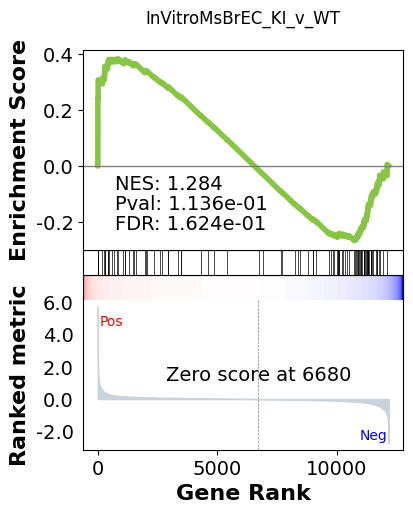

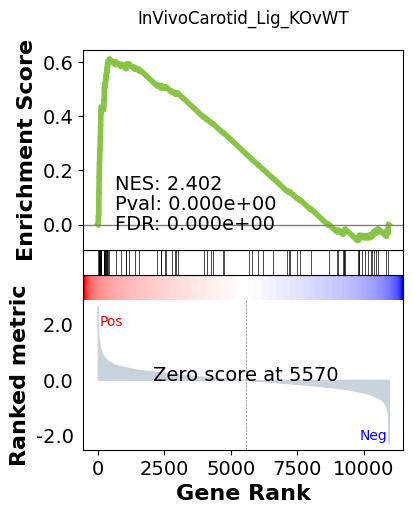

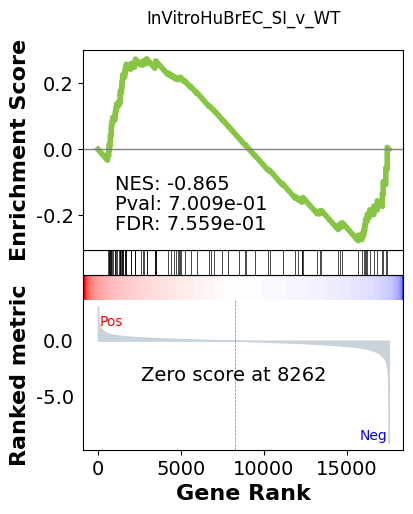

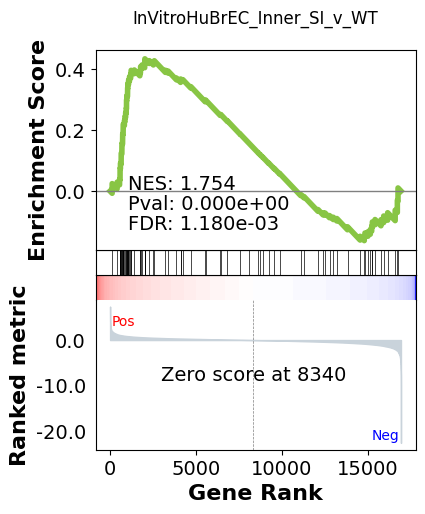

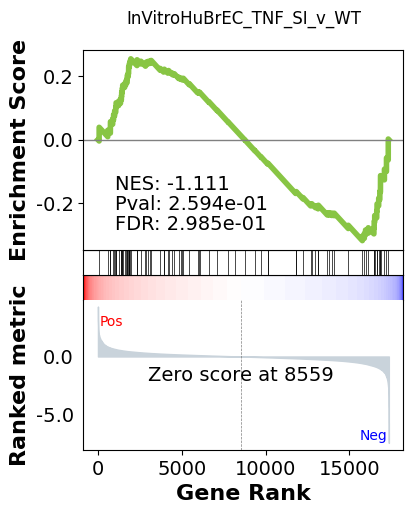

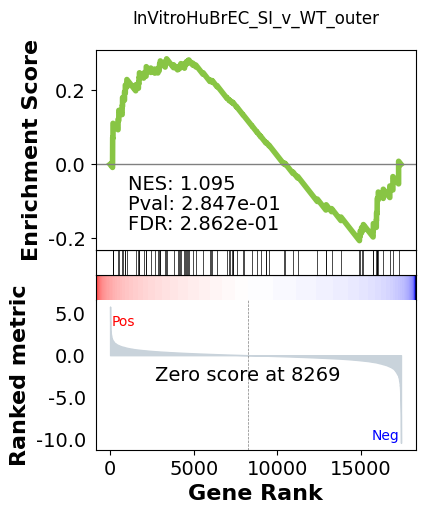

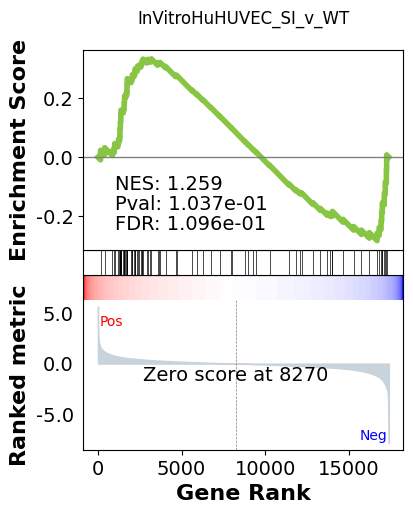

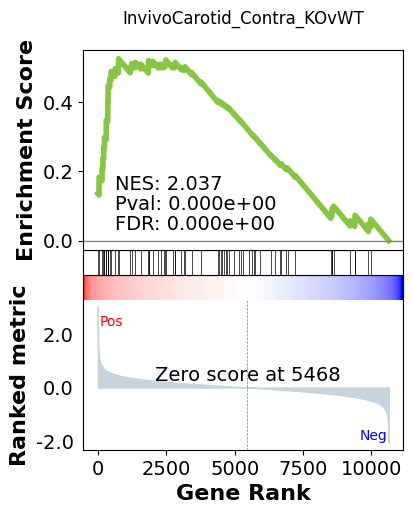

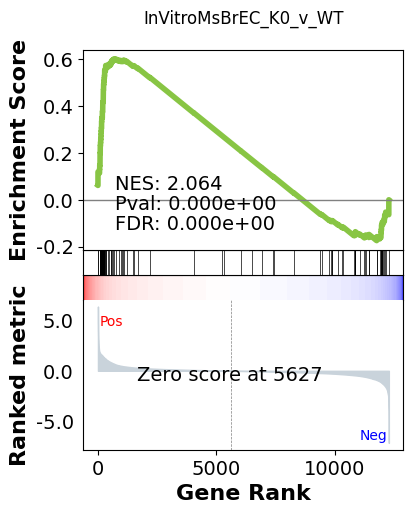

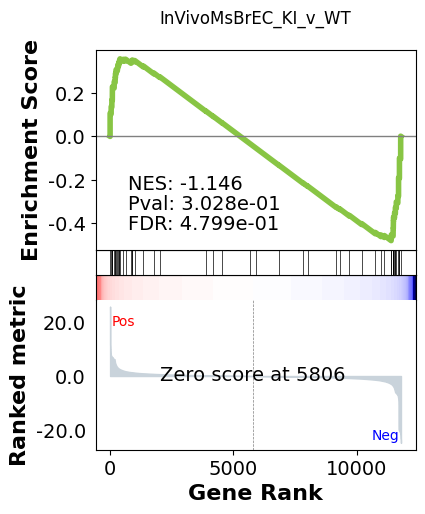

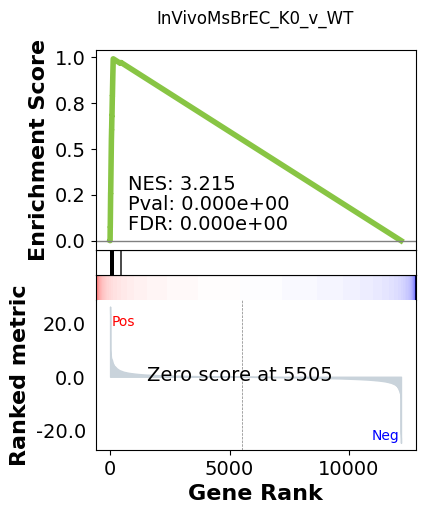

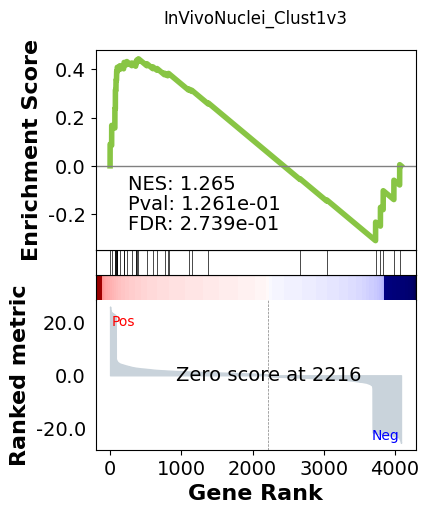

In [280]:
term_search = 'BrainEC_TardbpECKO_6v6_invivo_Up'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Desktop/GSEA_figures/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

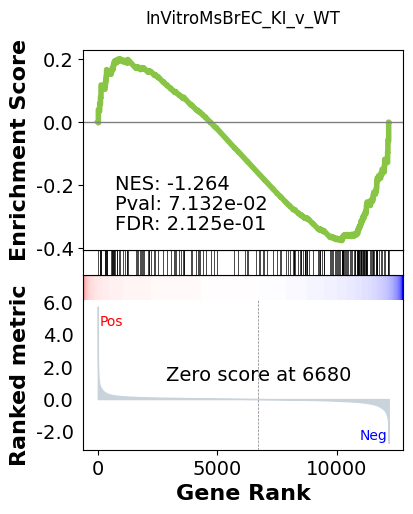

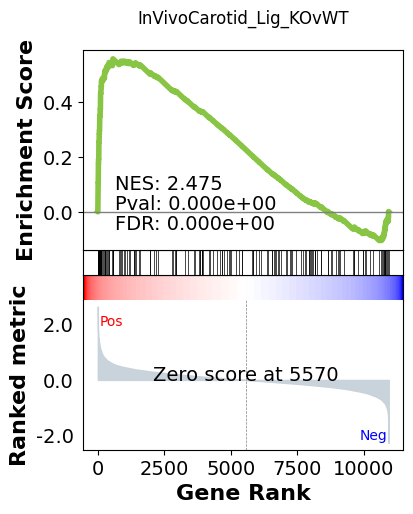

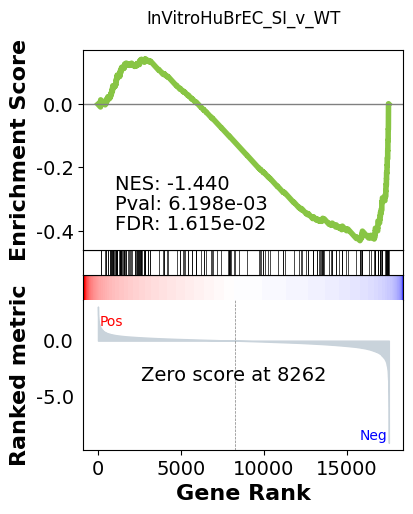

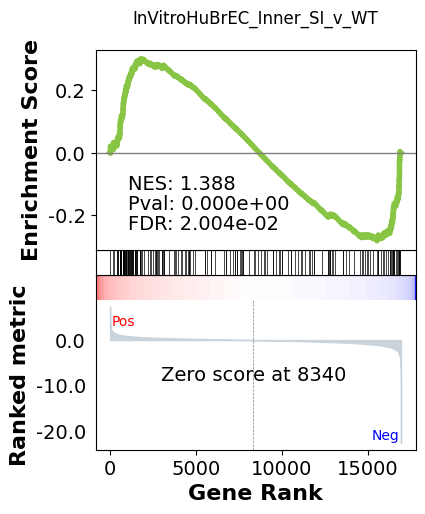

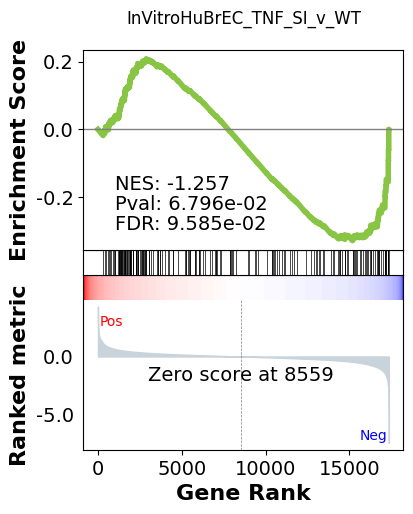

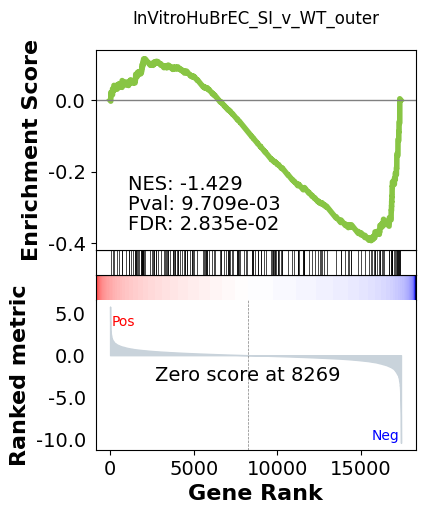

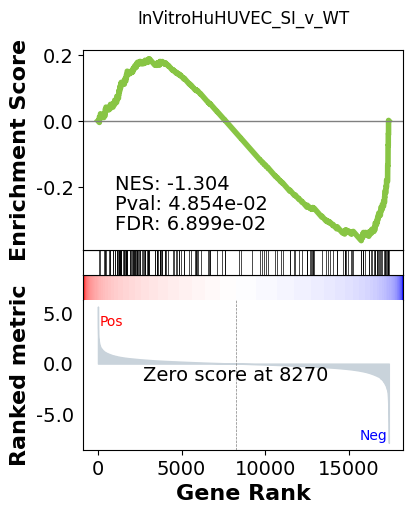

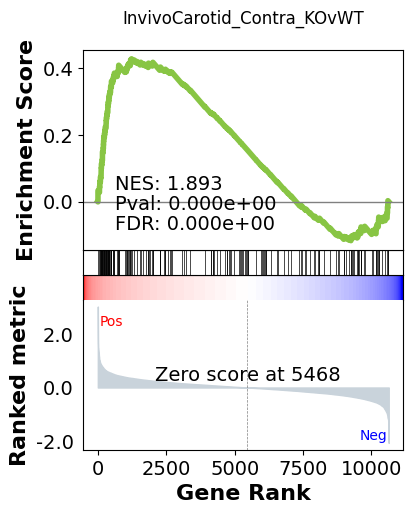

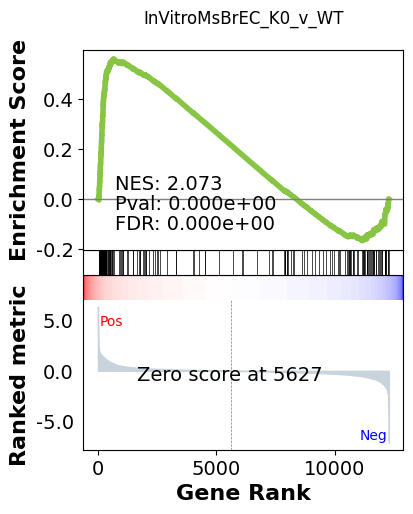

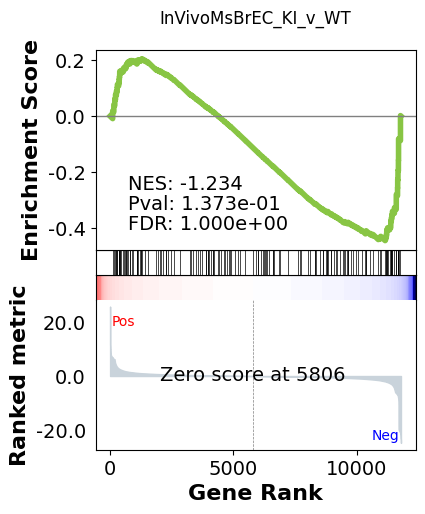

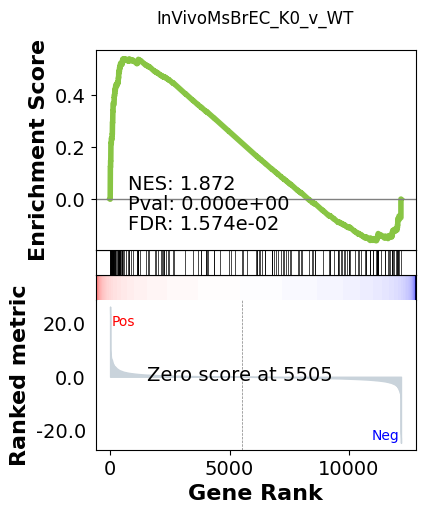

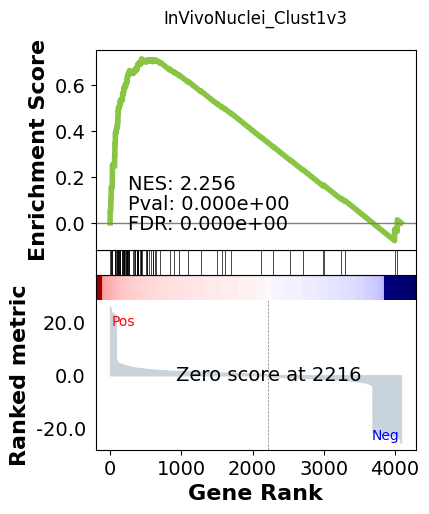

In [271]:
term_search = 'p3_iPSC_EC_CHIRvDMSO_PMID34755601_Down'

# Create a directory for the term if it doesn't exist
path = f"/Users/patrickmurphy/Desktop/GSEA_figures/{term_search}"
if not os.path.exists(path):
    os.makedirs(path)

# Loop through each item in the dictionary and plot
for title, data in gsea_result_custom2.items():
    # Plot the data
    fig = data.plot(terms=term_search)
    
    # Set the title of the plot
    fig.suptitle(title)

    # Save the plot as a PDF in the specific term folder
    fig.savefig(f"{path}/{title.replace(' ', '_')}.pdf", format='pdf')
        
    # Display the plot
    plt.show()

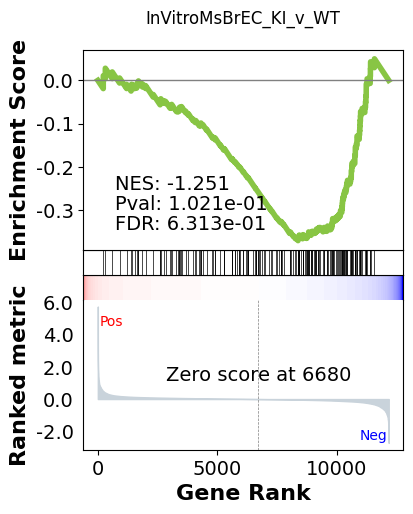

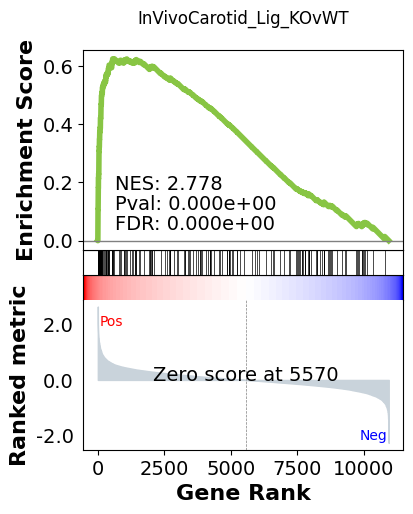

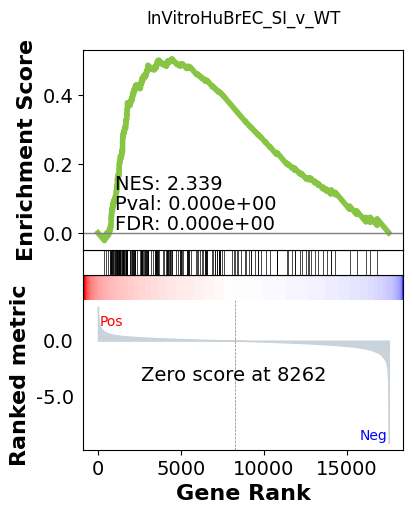

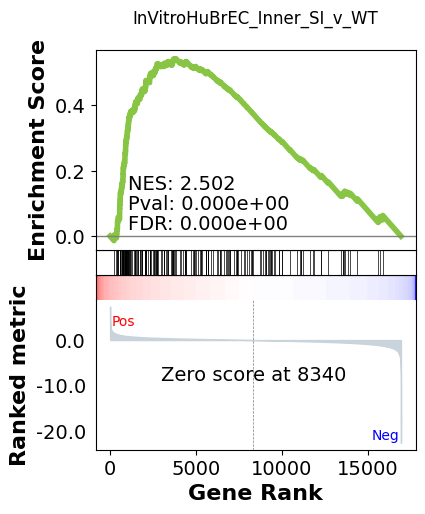

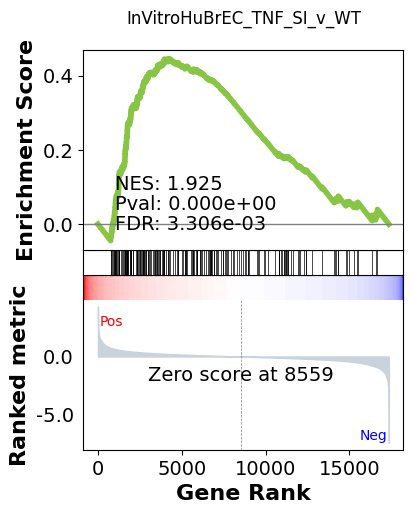

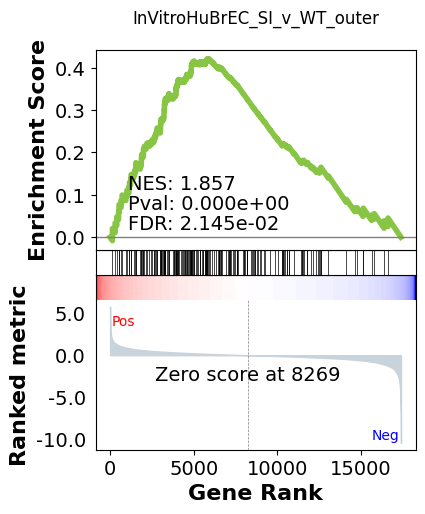

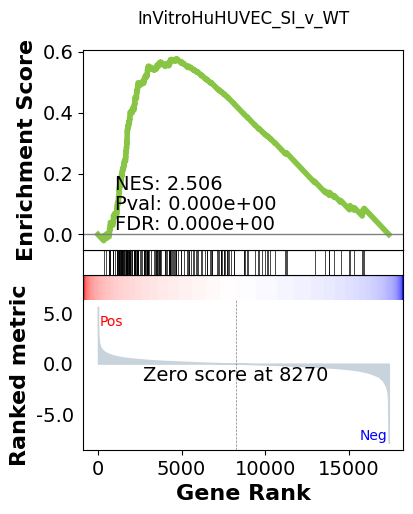

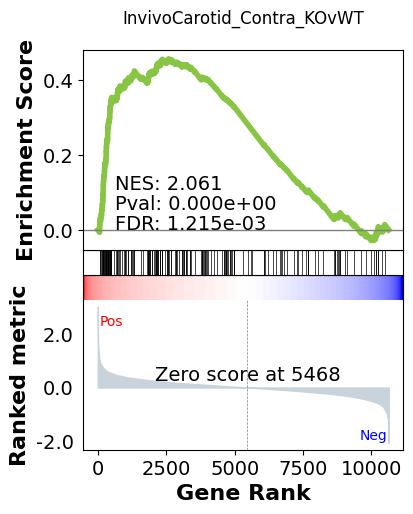

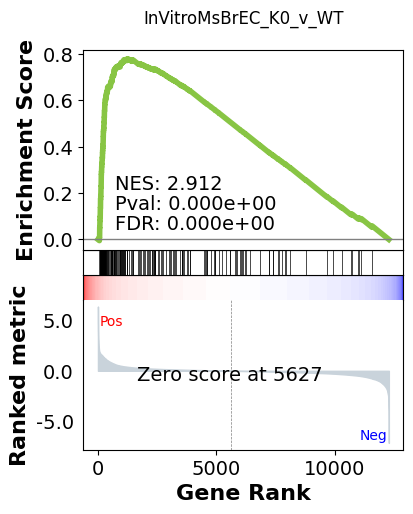

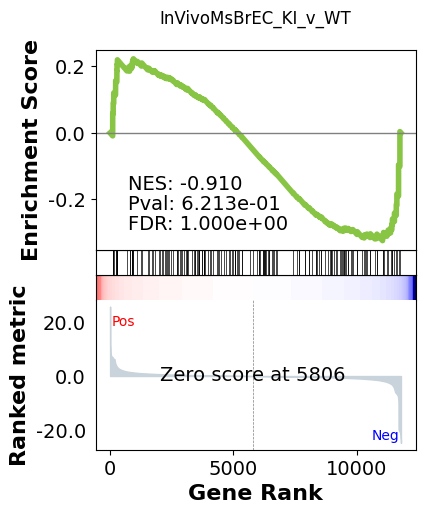

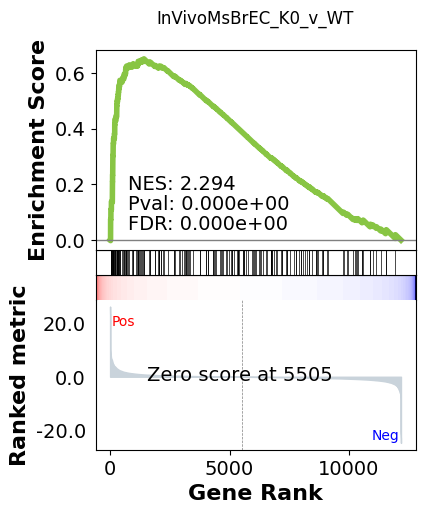

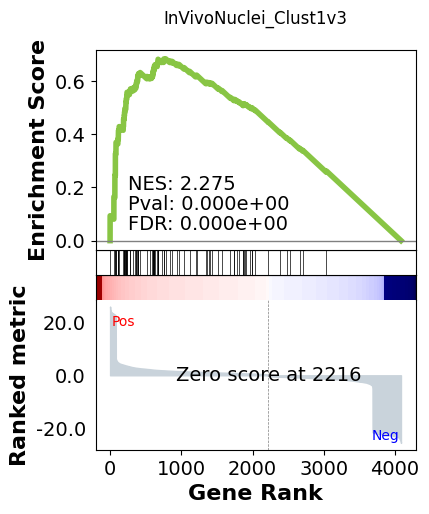

In [276]:
# Loop through each item in the dictionary and plot
for title, data in gsea_result.items():
    # Plot the data
    fig = data.plot(terms='MSigDB_Hallmark_2020__G2-M Checkpoint')
    
    # Set the title of the plot
    fig.suptitle(title)

# Save the plot as a PDF
    fig.savefig(f"/Users/patrickmurphy/Desktop/GSEA_figures/{title.replace(' ', '_')}.pdf", format='pdf')
    
    # Display the plot
    plt.show()

# Plot genes in term between datasets

In [62]:
#Prepare single cell res file so that it is in the same format as others

def reformat_df(combined_df):
    # Create a copy of the DataFrame
    formatted_df = combined_df.copy()

    # Print original columns for debugging
    print("Original columns:", formatted_df.columns.tolist())

    # If DataFrame has a column to be set as index, set it as index
    if '1_names' in formatted_df.columns:
        formatted_df.set_index('1_names', inplace=True)
    
    # Rename columns
    formatted_df.columns = formatted_df.columns.str.replace('1_logfoldchanges', 'log2FoldChange')
    formatted_df.columns = formatted_df.columns.str.replace('1_pvals_adj', 'padj')
    formatted_df.columns = formatted_df.columns.str.replace('1_pvals', 'pvalue')

    # Print new columns for debugging
    print("New columns:", formatted_df.columns.tolist())
    
    return formatted_df

def reformat_and_assign(df_name, df):
    reformatted_df = reformat_df(df)
    globals()[df_name + '_formatted'] = reformatted_df

# Example usage
reformat_and_assign('InVivoNuclei_Clust1v3_res', InVivoNuclei_Clust1v3_res)

Original columns: ['Unnamed: 0', '1_names', '1_scores', '1_logfoldchanges', '1_pvals_adj', '1_pvals']
New columns: ['Unnamed: 0', '1_scores', 'log2FoldChange', 'padj', 'pvalue']


In [56]:
InVitroMsBrEC_KI_v_WT_res_HsGeneID

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NaN        3.179151        0.813513  0.596352  1.364149  0.172521  0.999194
NaN        0.317445        0.774325  2.147881  0.360506  0.718468  0.999194
NaN      921.291126       -0.038530  0.166296 -0.231694  0.816776  0.999194
NaN       34.786652       -0.590343  0.770232 -0.766448  0.443410  0.999194
NaN       41.353547       -0.241785  0.340506 -0.710076  0.477657  0.999194
...             ...             ...       ...       ...       ...       ...
ZYG11A     0.158409       -0.991949  3.059679 -0.324200  0.745786  0.999194
ZYG11B  1220.481218       -0.013288  0.154834 -0.085824  0.931606  0.999194
ZYX     9752.166948       -0.045955  0.149852 -0.306673  0.759092  0.999194
ZZEF1   3270.052145        0.149254  0.123193  1.211542  0.225688  0.999194
ZZZ3    1555.877175        0.053970  0.135174  0.399260  0.689702  0.999194

[48137 rows x 6 columns]

In [57]:
InVitroHuBrEC_SI_v_WT_res

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG         10.710318        0.605715  0.374846  1.615906  0.106115  0.526630
A1BG.AS1     30.181794        0.292548  0.227613  1.285288  0.198692  0.701234
A1CF          0.083955       -0.512714  3.060383 -0.167533  0.866951  0.981834
A2M          92.047299       -1.993204  0.719113 -2.771753  0.005576  0.106671
A2M.AS1       6.103447       -1.646046  0.620475 -2.652882  0.007981  0.132351
...                ...             ...       ...       ...       ...       ...
ZYG11AP1      0.000000             NaN       NaN       NaN       NaN       NaN
ZYG11B     1574.238641       -0.116119  0.142047 -0.817468  0.413661  0.940547
ZYX       12421.766933        0.471157  0.215884  2.182458  0.029076  0.273139
ZYXP1         0.000000             NaN       NaN       NaN       NaN       NaN
ZZEF1       946.239823       -0.131657  0.262398 -0.501745  0.615847  0.981834

[58299 rows x 6 columns]

In [64]:
InVivoNuclei_Clust1v3_res_formatted

Unnamed: 0   1_scores  log2FoldChange           padj  \
1_names                                                            
GPCPD1               0 -30.077017       -3.390145  5.510748e-118   
SLCO1A2              1 -24.052660       -3.684128   2.069990e-95   
SPOCK3               2 -17.108288       -2.280543   3.213209e-50   
ABLIM1               3 -15.994058       -1.944379   2.340636e-43   
ABCG2                4 -15.992470       -1.762335   3.760651e-43   
...                ...        ...             ...            ...   
EPB41L4B          4085  -1.965366      -22.226084   3.999690e-01   
LRFN4             4088  -1.964947      -22.219006   4.000654e-01   
AC103796.1        4091  -1.964215      -22.100552   4.006493e-01   
FGD2              4092  -1.964025      -22.296753   4.006865e-01   
MDC1-AS1          4094  -1.963316      -22.145730   4.008992e-01   

                   pvalue  
1_names                    
GPCPD1      1.681798e-122  
SLCO1A2      1.263460e-99  
SPOCK3       2.941870e-54  
ABLIM1       3.571635e-47  
ABCG2        6.886167e-47  
...                   ...  
EPB41L4B     4.972911e-02  
LRFN4        4.977772e-02  
AC103796.1   4.986260e-02  
FGD2         4.988466e-02  
MDC1-AS1     4.996711e-02  

[4085 rows x 5 columns]

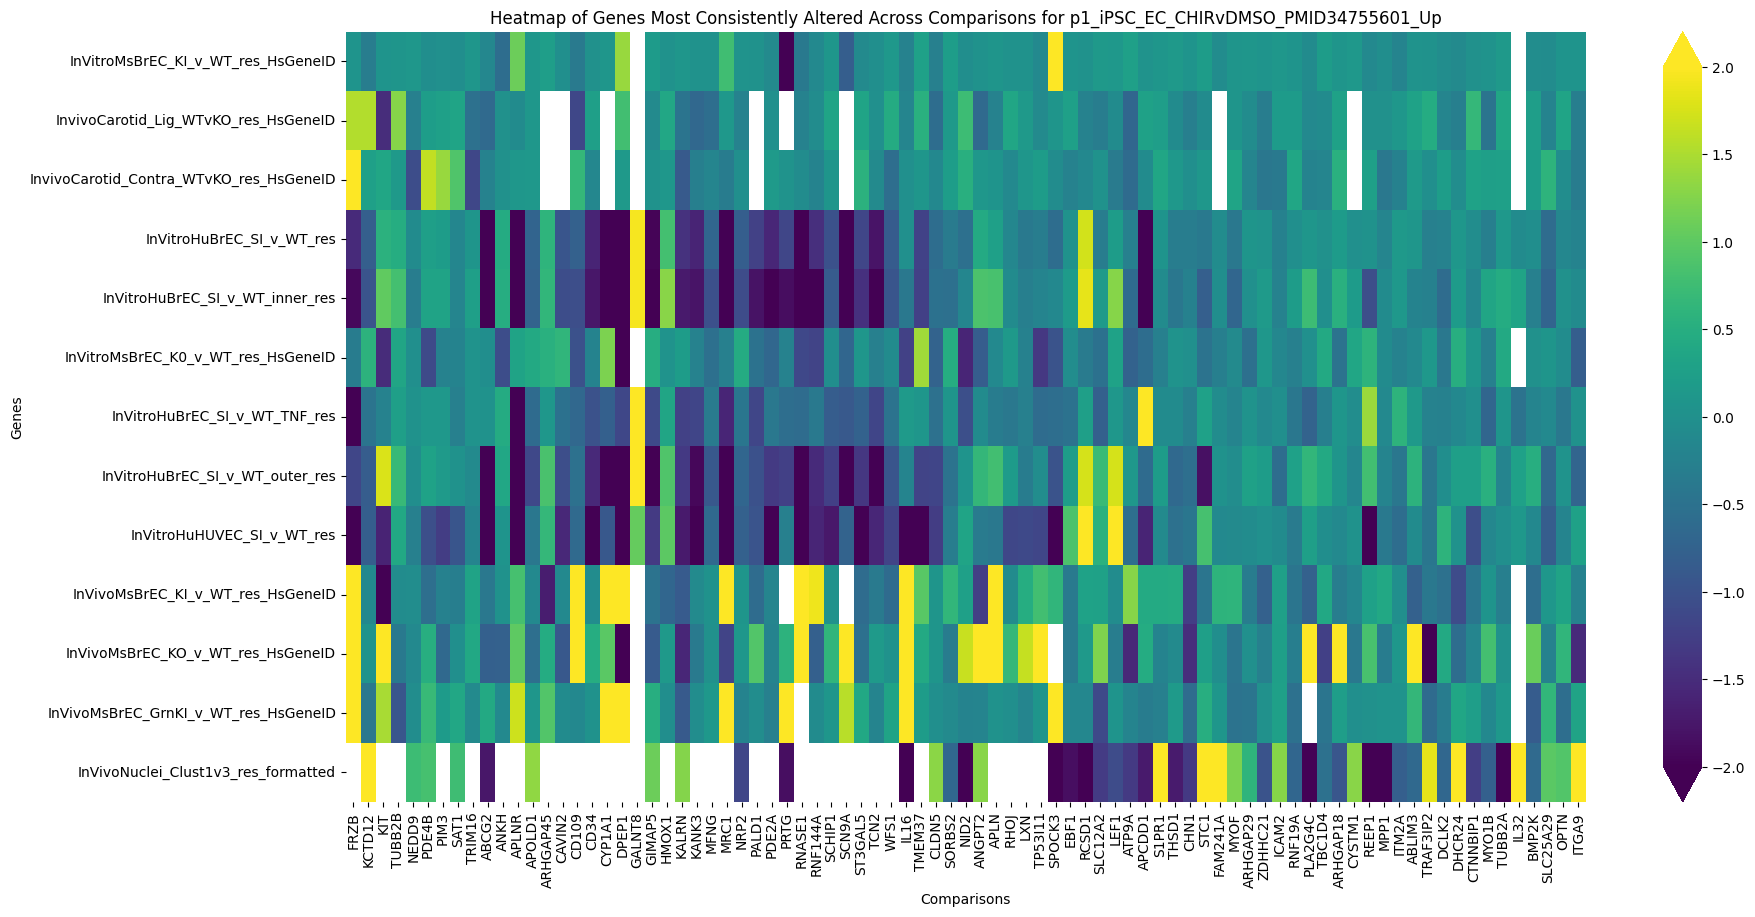

In [88]:
# Create a dictionary where keys are names and values are dataframes
df_dict_humangene_res = {
    'InVitroMsBrEC_KI_v_WT_res_HsGeneID': InVitroMsBrEC_KI_v_WT_res_HsGeneID,
    'InvivoCarotid_Lig_WTvKO_res_HsGeneID': InvivoCarotid_Lig_WTvKO_res_HsGeneID,
#    'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
#    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res_HsGeneID' : InvivoCarotid_Contra_WTvKO_res_HsGeneID, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
#    'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID' : InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_inner_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res_HsGeneID' : InVitroMsBrEC_K0_v_WT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_TNF_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
#    'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID' : InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    'InVivoMsBrEC_KI_v_WT_res_HsGeneID' : InVivoMsBrEC_KI_v_WT_res_HsGeneID,
    'InVivoMsBrEC_KO_v_WT_res_HsGeneID' : InVivoMsBrEC_KO_v_WT_res_HsGeneID,
    'InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID' : InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID,
    'InVivoNuclei_Clust1v3_res_formatted': InVivoNuclei_Clust1v3_res_formatted
}

# To extract a specific gene set
gene_set_name = "p1_iPSC_EC_CHIRvDMSO_PMID34755601_Up" #Replace with your actual gene set name
gsea_term_genes = custom_endo_human_genesets.get(gene_set_name, [])

# Convert the set of genes to a list for the DataFrame index
gsea_term_genes_list = list(gsea_term_genes)

# Step 1: Count the occurrences of significant p-values for each gene
significant_count = Counter()

for df in df_dict_humangene_res.values():
    significant_genes = df[(df['padj'] < 0.05) & df.index.isin(gsea_term_genes_list)].index
    significant_count.update(significant_genes)

# Filter genes based on significance count
filtered_genes = [gene for gene, count in significant_count.items() if count >= 1]

# Initialize a DataFrame to hold the log2FoldChange for the filtered genes in each DataFrame
combined_df = pd.DataFrame(index=filtered_genes)

for df_name, df in df_dict_humangene_res.items():
    # Drop duplicates in the index (gene names)
    df = df[~df.index.duplicated(keep='first')]

    # Filter the DataFrame for genes in the filtered_genes list
    filtered_df = df[df.index.isin(filtered_genes)]
    
    # Add the log2FoldChange values of the filtered_df to the combined_df
    combined_df[df_name] = filtered_df['log2FoldChange']

# Transpose the DataFrame to have comparisons as columns and genes as rows
combined_df = combined_df.T


# Create the Heatmap with the custom colormap
plt.figure(figsize=(20, 10))
sns.heatmap(combined_df, annot=False, cmap='viridis', vmin=-2, vmax=2, cbar_kws={'extend': 'both'})
plt.title(f'Heatmap of Genes Most Consistently Altered Across Comparisons for {gene_set_name}')
plt.xlabel('Comparisons')
plt.ylabel('Genes')
plt.show()

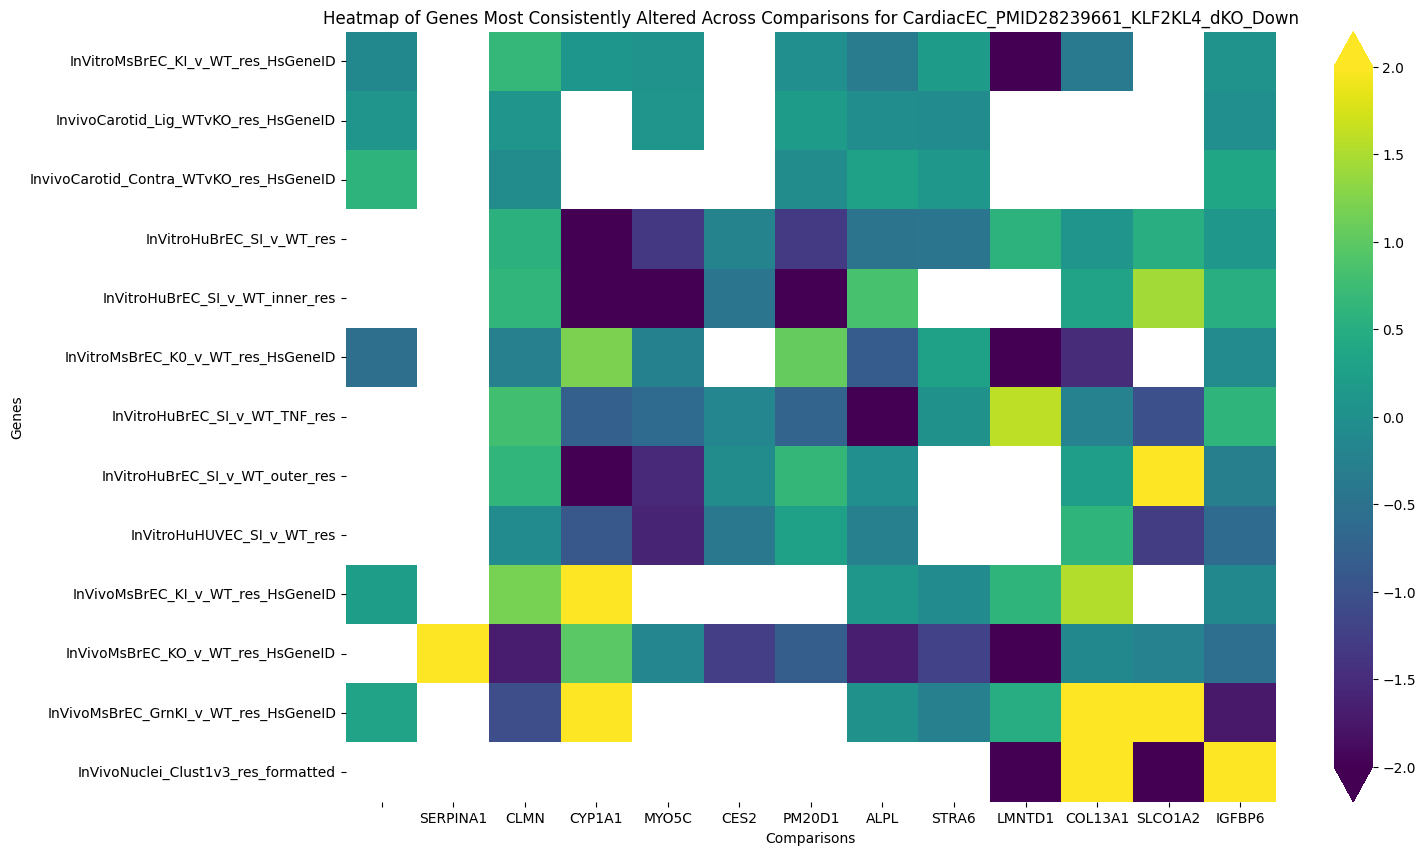

In [97]:
# Create a dictionary where keys are names and values are dataframes
df_dict_humangene_res = {
    'InVitroMsBrEC_KI_v_WT_res_HsGeneID': InVitroMsBrEC_KI_v_WT_res_HsGeneID,
    'InvivoCarotid_Lig_WTvKO_res_HsGeneID': InvivoCarotid_Lig_WTvKO_res_HsGeneID,
#    'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
#    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res_HsGeneID' : InvivoCarotid_Contra_WTvKO_res_HsGeneID, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
#    'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID' : InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_inner_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res_HsGeneID' : InVitroMsBrEC_K0_v_WT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_TNF_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
#    'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID' : InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    'InVivoMsBrEC_KI_v_WT_res_HsGeneID' : InVivoMsBrEC_KI_v_WT_res_HsGeneID,
    'InVivoMsBrEC_KO_v_WT_res_HsGeneID' : InVivoMsBrEC_KO_v_WT_res_HsGeneID,
    'InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID' : InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID,
    'InVivoNuclei_Clust1v3_res_formatted': InVivoNuclei_Clust1v3_res_formatted
}

# To extract a specific gene set
gene_set_name = "CardiacEC_PMID28239661_KLF2KL4_dKO_Down" #Replace with your actual gene set name
gsea_term_genes = custom_endo_mus_HsID_genesets.get(gene_set_name, [])

# Convert the set of genes to a list for the DataFrame index
gsea_term_genes_list = list(gsea_term_genes)

# Step 1: Count the occurrences of significant p-values for each gene
significant_count = Counter()

for df in df_dict_humangene_res.values():
    significant_genes = df[(df['padj'] < 0.05) & df.index.isin(gsea_term_genes_list)].index
    significant_count.update(significant_genes)

# Filter genes based on significance count
filtered_genes = [gene for gene, count in significant_count.items() if count >= 1]

# Initialize a DataFrame to hold the log2FoldChange for the filtered genes in each DataFrame
combined_df = pd.DataFrame(index=filtered_genes)

for df_name, df in df_dict_humangene_res.items():
    # Drop duplicates in the index (gene names)
    df = df[~df.index.duplicated(keep='first')]

    # Filter the DataFrame for genes in the filtered_genes list
    filtered_df = df[df.index.isin(filtered_genes)]
    
    # Add the log2FoldChange values of the filtered_df to the combined_df
    combined_df[df_name] = filtered_df['log2FoldChange']

# Transpose the DataFrame to have comparisons as columns and genes as rows
combined_df = combined_df.T


# Create the Heatmap with the custom colormap
plt.figure(figsize=(15, 10))
sns.heatmap(combined_df, annot=False, cmap='viridis', vmin=-2, vmax=2, cbar_kws={'extend': 'both'})
plt.title(f'Heatmap of Genes Most Consistently Altered Across Comparisons for {gene_set_name}')
plt.xlabel('Comparisons')
plt.ylabel('Genes')
plt.show()

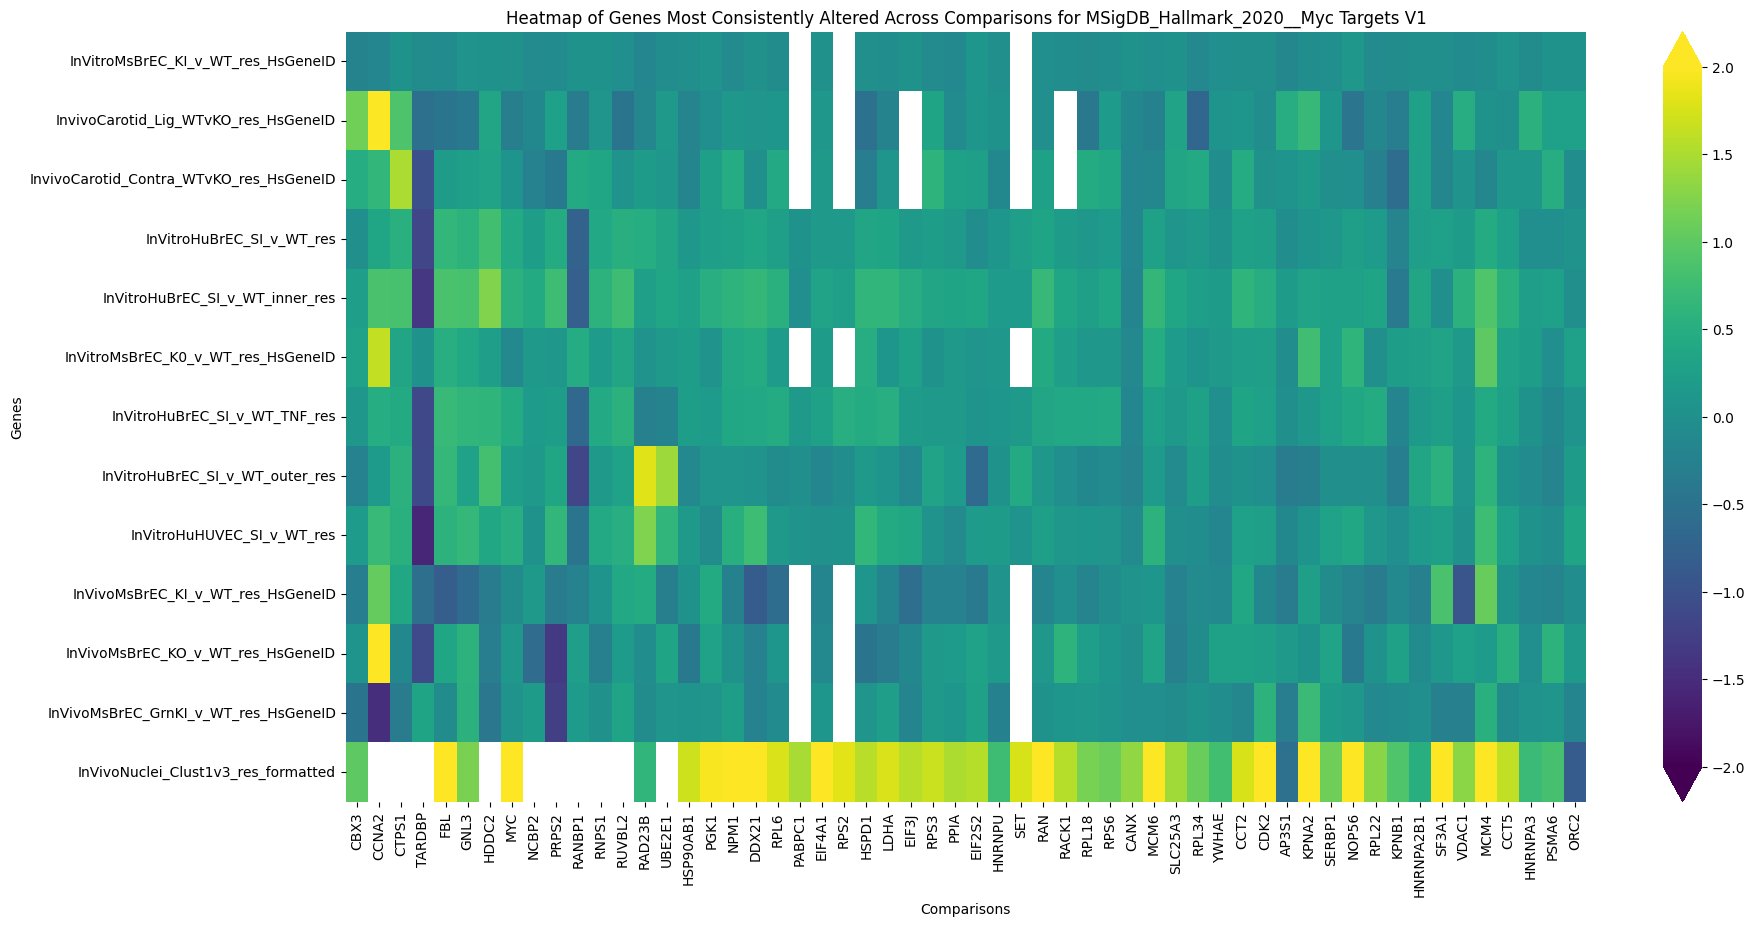

In [66]:
# Create a dictionary where keys are names and values are dataframes
df_dict_humangene_res = {
    'InVitroMsBrEC_KI_v_WT_res_HsGeneID': InVitroMsBrEC_KI_v_WT_res_HsGeneID,
    'InvivoCarotid_Lig_WTvKO_res_HsGeneID': InvivoCarotid_Lig_WTvKO_res_HsGeneID,
#    'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
#    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res_HsGeneID' : InvivoCarotid_Contra_WTvKO_res_HsGeneID, 
    'InVitroHuBrEC_SI_v_WT_res' : InVitroHuBrEC_SI_v_WT_res,
#    'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID' : InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_inner_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res_HsGeneID' : InVitroMsBrEC_K0_v_WT_res_HsGeneID,
    'InVitroHuBrEC_SI_v_WT_TNF_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
#    'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID' : InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    'InVivoMsBrEC_KI_v_WT_res_HsGeneID' : InVivoMsBrEC_KI_v_WT_res_HsGeneID,
    'InVivoMsBrEC_KO_v_WT_res_HsGeneID' : InVivoMsBrEC_KO_v_WT_res_HsGeneID,
    'InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID' : InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID,
    'InVivoNuclei_Clust1v3_res_formatted': InVivoNuclei_Clust1v3_res_formatted
}

term='MSigDB_Hallmark_2020__Myc Targets V1'
gsea_term_genes = all_terms.get(term, set())

# Convert the set of genes to a list for the DataFrame index
gsea_term_genes_list = list(gsea_term_genes)

# Step 1: Count the occurrences of significant p-values for each gene
significant_count = Counter()

for df in df_dict_humangene_res.values():
    significant_genes = df[(df['padj'] < 0.05) & df.index.isin(gsea_term_genes_list)].index
    significant_count.update(significant_genes)

# Filter genes based on significance count
filtered_genes = [gene for gene, count in significant_count.items() if count >= 1]

# Initialize a DataFrame to hold the log2FoldChange for the filtered genes in each DataFrame
combined_df = pd.DataFrame(index=filtered_genes)

for df_name, df in df_dict_humangene_res.items():
    # Drop duplicates in the index (gene names)
    df = df[~df.index.duplicated(keep='first')]

    # Filter the DataFrame for genes in the filtered_genes list
    filtered_df = df[df.index.isin(filtered_genes)]
    
    # Add the log2FoldChange values of the filtered_df to the combined_df
    combined_df[df_name] = filtered_df['log2FoldChange']

# Transpose the DataFrame to have comparisons as columns and genes as rows
combined_df = combined_df.T


# Create the Heatmap with the custom colormap
plt.figure(figsize=(20, 10))
sns.heatmap(combined_df, annot=False, cmap='viridis', vmin=-2, vmax=2, cbar_kws={'extend': 'both'})
plt.title(f'Heatmap of Genes Most Consistently Altered Across Comparisons for {term}')
plt.xlabel('Comparisons')
plt.ylabel('Genes')
plt.show()

In [236]:
#This will extract the top genes for each term in each data set

# Create a dictionary where keys are names and values are dataframes
df_dict_humangene_res = {
    'InVitroMsBrEC_KI_v_WT_res_HsGeneID': InVitroMsBrEC_KI_v_WT_res_HsGeneID,
    'InvivoCarotid_Lig_WTvKO_res_HsGeneID': InvivoCarotid_Lig_WTvKO_res_HsGeneID,
    'InVitroMsBrEC_TNF_KIvWT_res_HsGeneID': InVitroMsBrEC_TNF_KIvWT_res_HsGeneID,
    'InVitroHuHBEC_SI_v_WT_res' : InVitroHuHBEC_SI_v_WT_res,
    'InvivoCarotid_Contra_WTvKO_res_HsGeneID' : InvivoCarotid_Contra_WTvKO_res_HsGeneID, 
    'InVitroHuBrEC_SI_v_WT_res_HsGeneID' : InVitroHuBrEC_SI_v_WT_res_HsGeneID,
    'InVitroMsBrEC_Inner_KIvWT_res_HsGeneID' : InVitroMsBrEC_Inner_KIvWT_res_HsGeneID,
    'InVitroHuBrEC_Inner_siTDP43vWT_res' : InVitroHuBrEC_Inner_siTDP43vWT_res,
    'InVitroMsBrEC_K0_v_WT_res_HsGeneID' : InVitroMsBrEC_K0_v_WT_res_HsGeneID,
    'InVitroHuBrEC_TNF_siTDP43vWT_res' : InVitroHuBrEC_TNF_siTDP43vWT_res,
    'InVitroHuBrEC_SI_v_WT_outer_res' : InVitroHuBrEC_SI_v_WT_outer_res,
    'InVitroHuHUVEC_SI_v_WT_res' : InVitroHuHUVEC_SI_v_WT_res,
    'InVitroMsBrEC_Outer_KIvWT_res_HsGeneID' : InVitroMsBrEC_Outer_KIvWT_res_HsGeneID,
    'InVivoMsBrEC_KI_v_WT_res_HsGeneID' : InVivoMsBrEC_KI_v_WT_res_HsGeneID,
    'InVivoMsBrEC_KO_v_WT_res_HsGeneID' : InVivoMsBrEC_KO_v_WT_res_HsGeneID,
    'InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID' : InVivoMsBrEC_GrnKI_v_WT_res_HsGeneID,
    'InVivoNuclei_Clust1v3_res_format': InVivoNuclei_Clust1v3_res_format
}

term='KEGG_2021_Human__Focal adhesion'
term_genes = all_terms.get(term, set())

def extract_genes(combined_df, term_genes, df_name):
    # Filter the dataframe by pvalue < 0.05
    df = df[df['pvalue'] < 0.05]
    
    # Filter genes that are in the term_genes
    df = df[df.index.isin(term_genes)]

    # Further filter the dataframe to ensure top genes have log2FC > 0 and bottom genes have log2FC < 0
    top_genes = df[df['log2FoldChange'] > 0]
    bottom_genes = df[df['log2FoldChange'] < 0]

    # Sort the filtered dataframe by log2FoldChange and extract the bottom and top 100 genes
    bottom_100 = bottom_genes.sort_values(by='log2FoldChange').head(100)
    top_100 = top_genes.sort_values(by='log2FoldChange', ascending=False).head(100)

    # Combine the results and add a column indicating which dict the results came from
    result = pd.concat([bottom_100, top_100])
    result['source_df'] = df_name  # adding a column indicating which DataFrame the results came from

    return result


all_results = []  # to store the results from all DataFrames

# Iterate over each dataframe in the dictionary
for df_name, df in df_dict_humangene_res.items():
    extracted_genes_df = extract_genes(df, term_genes, df_name)
    all_results.append(extracted_genes_df)

# Concatenate all results into a single dataframe
final_result = pd.concat(all_results)

#final_result.to_csv('/Users/patrickmurphy/Desktop/top_terms_results_Focaladhesion.csv', index=True)

df = final_result

def count_pos_neg(group):
    count_pos = group[group['log2FoldChange'] > 0].shape[0]
    count_neg = group[group['log2FoldChange'] < 0].shape[0]
    return pd.Series({'count_pos': count_pos, 'count_neg': count_neg})

# If gene names are in the index, reset the index first
df.reset_index(inplace=True)

# Rename the column containing gene names to 'gene'
df.rename(columns={'index': 'gene'}, inplace=True)

# Now group by 'gene' and apply the custom function
result = df.groupby('gene').apply(count_pos_neg).reset_index()

# Sorting the DataFrame based on the count_pos column in descending order and printing top 5 rows
top_5_pos = result.sort_values(by='count_pos', ascending=False).head(5)
print("Top 5 counts for positive log2FoldChange:")
print(top_5_pos)

# Sorting the DataFrame based on the count_neg column in descending order and printing top 5 rows
top_5_neg = result.sort_values(by='count_neg', ascending=False).head(5)
print("\nTop 5 counts for negative log2FoldChange:")
print(top_5_neg)

Top 5 counts for positive log2FoldChange:
      gene  count_pos  count_neg
0     ACTB          3          0
23  COL4A2          3          0
81  MYL12B          3          0
54   ITGA5          2          1
53   ITGA4          2          0

Top 5 counts for negative log2FoldChange:
       gene  count_pos  count_neg
49   ITGA11          0          3
115    SOS1          0          3
69    LAMA3          0          3
102   PRKCB          0          3
20   COL1A1          1          3


In [238]:
result

gene  count_pos  count_neg
0     ACTB          3          0
1    ACTG1          1          0
2    ACTN1          2          0
3    ACTN4          1          0
4     AKT1          0          1
..     ...        ...        ...
128  VEGFA          2          1
129  VEGFC          0          1
130    VWF          1          2
131   XIAP          1          0
132    ZYX          1          0

[133 rows x 3 columns]

In [ ]:
####Below is unused code

ValueError: The number of observations cannot be determined on an empty distance matrix.

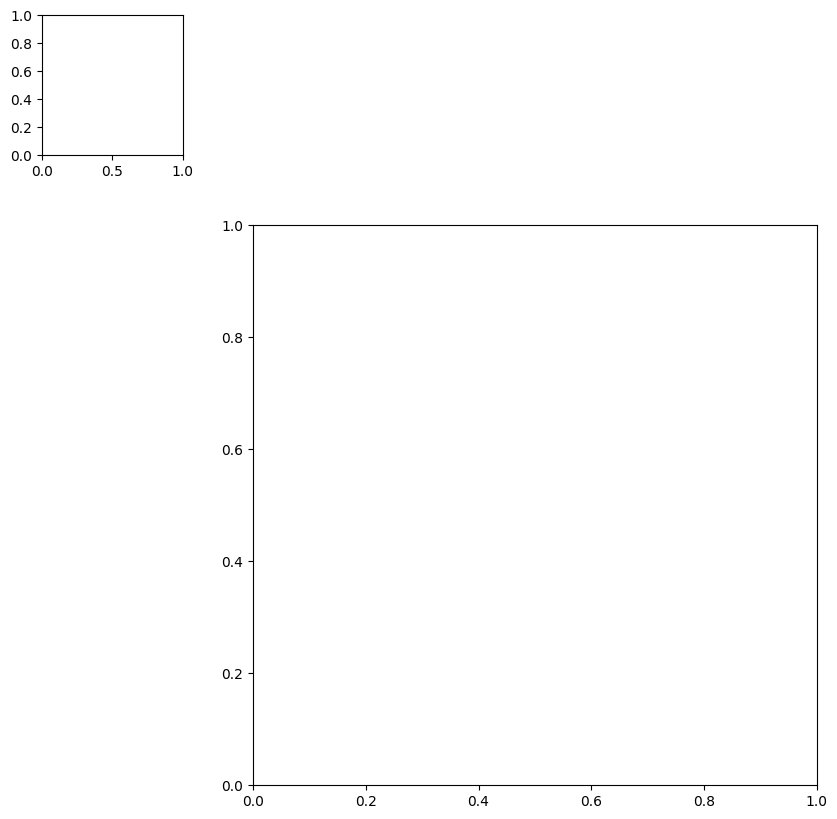

In [26]:
#Filter based on same dir in most

# List of p-val columns in the merged dataframe
fw_cols = [col for col in merged_GSEA_df.columns if 'q-val' in col]

# List of direction columns (assuming they are 'NES' columns for example)
direction_cols = [col for col in merged_GSEA_df.columns if 'NES' in col]

# Create a mask for rows with q-value < 0.1 in at least two datasets
pval_mask = (merged_GSEA_df[fw_cols] < 0.05).sum(axis=1) >= 2

# For direction, count the number of positive and negative values in direction_cols
positive_counts = (merged_GSEA_df[direction_cols] > 0).sum(axis=1)
negative_counts = (merged_GSEA_df[direction_cols] < 0).sum(axis=1)

# Create masks for rows where the count of positive values or negative values is greater than 12
positive_direction_mask = positive_counts > 11
negative_direction_mask = negative_counts > 11

# Combine the two masks using bitwise OR operator
direction_mask = positive_direction_mask | negative_direction_mask

# Combine the two masks using bitwise AND operator
final_mask = pval_mask & direction_mask

# Filter the DataFrame based on the combined mask
filtered_GSEA_df = merged_GSEA_df[final_mask]

# Select only the NES columns
# Assuming your DataFrame merged_GSEA_df has columns like 'NES_filename'
nes_cols = [col for col in filtered_GSEA_df.columns if 'NES' in col]
data_for_heatmap = filtered_GSEA_df.set_index('Term')[nes_cols]

# Replace NaN values with 0
data_for_heatmap = data_for_heatmap.fillna(0)

# Create a clustered heatmap based on NES values
g = sns.clustermap(
    data_for_heatmap, 
    method='average', 
    cmap='coolwarm', 
    row_cluster=True, 
    col_cluster=True, 
    figsize=(10, 10),
    cbar_kws={"label": "Your Label", "shrink": 0.5},  # shrink colorbar, and add label
    xticklabels=True, 
    yticklabels=True
)

# Adjust the label sizes
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 10)  # Set x-axis label size
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 5)  # Set y-axis label size

# Save the figure with 600 dpi
g.savefig('/Users/patrickmurphy/Desktop/ClusteringGSEA_filt_samedir.png', dpi=600)